<a href="https://colab.research.google.com/github/crockrocks/Predict_Flow/blob/main/feature_engineering_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d stutern/nigerian-gradaute-report-2018

nigerian-gradaute-report-2018.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip nigerian-gradaute-report-2018.zip

Archive:  nigerian-gradaute-report-2018.zip
replace Nigerian Graduates Destination Survey (2013 -2017) (Responses) - nigerian graduates survey 2018.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Importing all the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# EDA ( Exploratory Data Analysis )

In [ ]:
df = pd.read_csv("Nigerian Graduates Destination Survey (2013 -2017) (Responses) - nigerian graduates survey 2018.csv")

In [ ]:
df.head()

Timestamp What is your gender  Year of graduation  \
0    2/8/2018 9:05:23                Male                2013   
1  2/15/2018 12:11:32                Male                2014   
2  2/15/2018 13:47:10              Female                2013   
3  2/16/2018 13:01:34                Male                2017   
4  2/16/2018 13:18:03              Female                2013   

                             Title of course studied  \
0                Electrical & Electronic Engineering   
1                                         Psychology   
2                                          Economics   
3  Mass Communication (Communication and Language...   
4                                         Statistics   

        Polytechnic/University attended  \
0    Obafemi Awolowo University,Ile-Ife   
1    Obafemi Awolowo University,Ile-Ife   
2  Bells University of Technology, Otta   
3                 Bowen University, Iwo   
4                Ekiti State University   

  What is your highest level of education?  \
0                        Bachelor's degree   
1                        Bachelor's degree   
2                        Bachelor's degree   
3                          Master's degree   
4                        Bachelor's degree   

  What best describes your current status?  \
0      Working full time (paid employment)   
1      Working full time (paid employment)   
2      Working full time (paid employment)   
3     Self-employed/freelance/entrepreneur   
4      Working full time (paid employment)   

   How many jobs have you had since graduation including your current one?  \
0                                                  3                         
1                                                  2                         
2                                                  2                         
3                                                  0                         
4                                                  3                         

  Have you completed your NYSC?  \
0                           NaN   
1                           Yes   
2                           Yes   
3                           Yes   
4                           Yes   

   If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?  \
0                                                NaN                                                           
1                                             2017.0                                                           
2                                                NaN                                                           
3                                                NaN                                                           
4                                             2016.0                                                           

   ... What currency are you currently paid in?  \
0  ...                                    Naira   
1  ...                                    Naira   
2  ...                                    Naira   
3  ...                                      NaN   
4  ...                                    Naira   

  Approximately how many hours a day do you currently work?  \
0                                                8.0          
1                                                8.0          
2                                               14.0          
3                                                NaN          
4                                                8.0          

  As far as you are aware, what was most important to your current employer about your qualification?  \
0                         No one thing was important                                                    
1  IT/SIWES/Internship experience (gained as part...                                                    
2                           The subject(s) I studied                                                    
3           

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 36 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   Timestamp                                                                                                                     5219 non-null   object 
 1   What is your gender                                                                                                           5219 non-null   object 
 2   Year of graduation                                                                                                            5219 non-null   int64  
 3   Title of course studied                                                                                          

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Timestamp': ['2/8/2018 9:05:23' '2/15/2018 12:11:32' '2/15/2018 13:47:10' ...
 '5/15/2018 10:33:45' '5/15/2018 13:49:47' '5/15/2018 23:39:09']
Unique values in column 'What is your gender': ['Male' 'Female' 'Prefer not to say']
Unique values in column 'Year of graduation': [2013 2014 2017 2015 2016]
Unique values in column 'Title of course studied': ['Electrical & Electronic Engineering' 'Psychology' 'Economics'
 'Mass Communication (Communication and Language Arts)' 'Statistics'
 'Accountancy' 'Industrial Relations and Personnel Management'
 'Biochemistry' 'Banking and Finance' 'Petroleum and Gas Engineering'
 'Geography' 'Computer Science' 'Quantity Surveying' 'Fisheries'
 'Mechanical Engineering' 'Geophysics' 'Architecture' 'Philosophy'
 'Civil Engineering' 'Agricultural and Bioresources Engineering'
 'Hospitality and Tourism' 'Mathematics' 'Chemical Engineering' 'Geology'
 'Microbiology' 'Computer Engineering'
 'Forest Resources Management (Forestry)' 'Buil

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 37 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype         
---  ------                                                                                                                        --------------  -----         
 0   Timestamp                                                                                                                     5219 non-null   datetime64[ns]
 1   What is your gender                                                                                                           5219 non-null   object        
 2   Year of graduation                                                                                                            5219 non-null   int64         
 3   Title of course studied                                                       

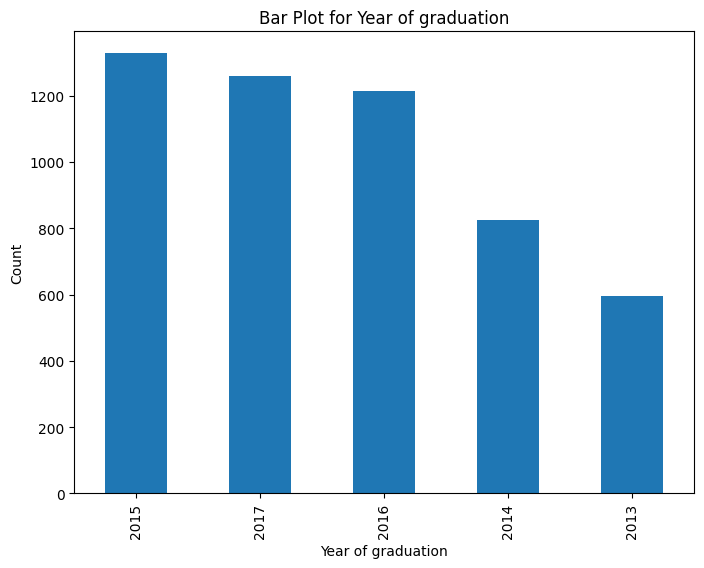

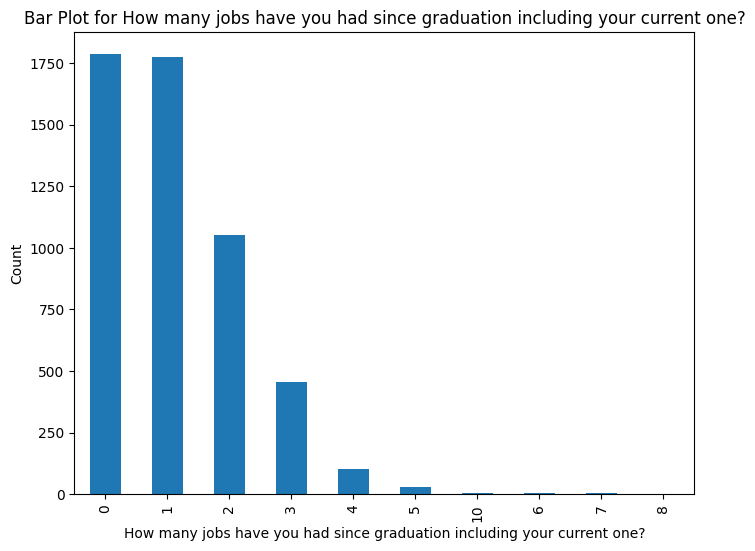

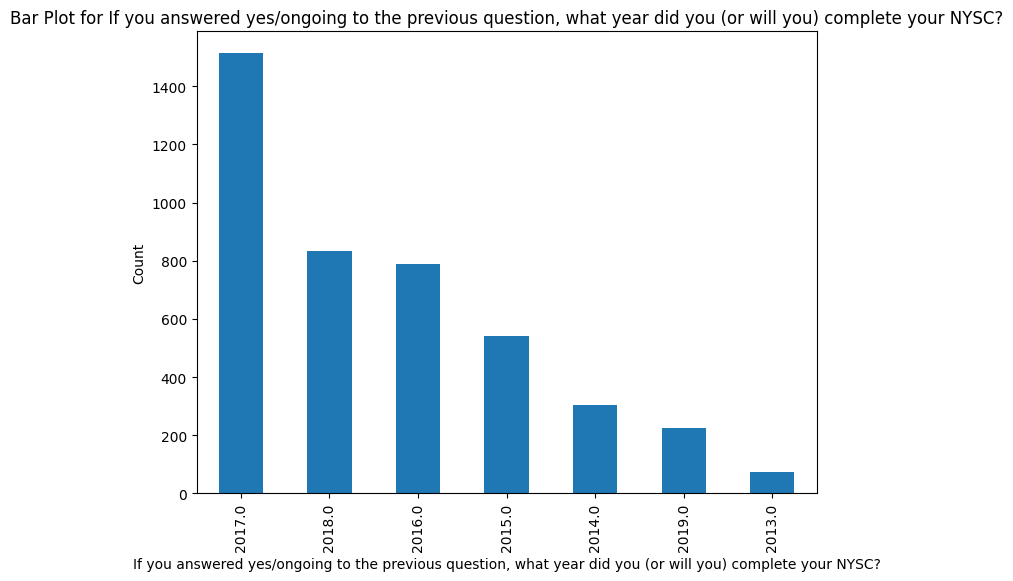

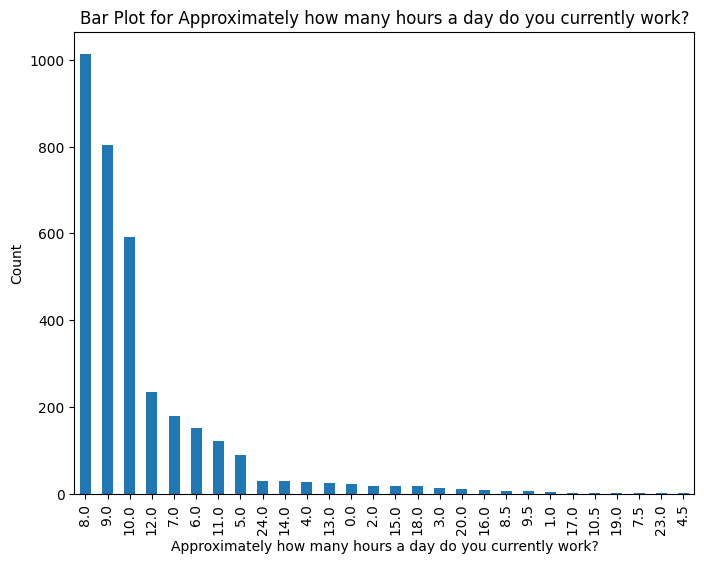

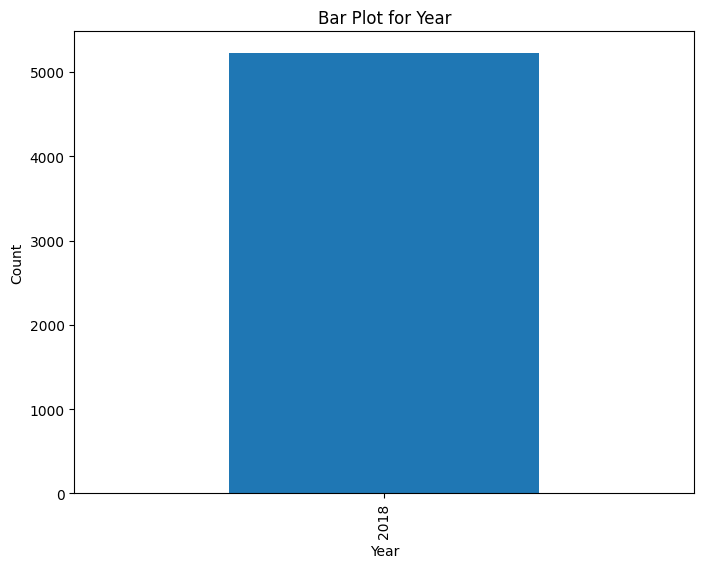

In [ ]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [ ]:
unique_value_counts = {}

for column in df.columns:
    unique_count = df[column].nunique()
    unique_value_counts[column] = unique_count

unique_counts_df = pd.DataFrame(list(unique_value_counts.items()), columns=['Column', 'Unique Value Count'])

unique_counts_df

Column  Unique Value Count
0                                           Timestamp                5205
1                                 What is your gender                   3
2                                  Year of graduation                   5
3                             Title of course studied                 127
4                     Polytechnic/University attended                 158
5            What is your highest level of education?                   6
6            What best describes your current status?                  10
7   How many jobs have you had since graduation in...                  10
8                       Have you completed your NYSC?                   3
9   If you answered yes/ongoing to the previous qu...                   7
10  Did you get your first full time job through y...                   3
11  Thinking about your first employment after gra...                   6
12                         What is/was your job role?                  44
13  What sector/industry is your company in? (E.g....                  30
14  Still thinking about your first employment, wh...                   7
15  Did you need your higher education qualificati...                   4
16  What was the most significant reason for decid...                   9
17  Thinking about your current employment, what i...                   6
18                             What is your job role?                  46
19  What sector/industry is your company in? (E.g....                  30
20         What is your current monthly income level?                   7
21  Did you need your higher education qualificati...                   4
22  What was the most significant reason for decid...                 154
23  Which employer in the country do you think off...                1625
24                                        Reason why?                 155
25  Which sector is your most preferred sector to ...                  30
26           What currency are you currently paid in?                   2
27  Approximately how many hours a day do you curr...                  28
28  As far as you are aware, what was most importa...                 389
29             How do you find out about your job(s)?                   7
30  Thinking about your current employment, did yo...                   4
31       Which form of transport do you use the most?                  10
32  Were you able to rent an apartment or buy a ca...                   3
33  My course of study prepared me well for employ...                   5
34  My course of study prepared me well for furthe...                   5
35  Which of these skills/knowledge did your highe...                  69
36                                               Year                   1

In [ ]:
differences = df['What is/was your job role?'].compare(df['What is your job role?'])

In [ ]:
differences

self                other
1                    NaN             Option 1
4     Operations Manager     Business Analyst
6       Business Analyst   Software Developer
7                    NaN   Finance/Accounting
8       Customer Service      Human Resources
...                  ...                  ...
5203                 NaN       Office Manager
5204             Teacher  Mechanical Engineer
5211    Customer Service              Teacher
5214                 NaN            Marketing
5216                 NaN   Business Developer

[2562 rows x 2 columns]

In [ ]:
repeated_value_counts = df['Timestamp'].value_counts()
print(repeated_value_counts[repeated_value_counts > 1])

2018-04-03 13:48:12    2
2018-03-07 11:01:28    2
2018-03-25 18:20:33    2
2018-03-06 12:51:51    2
2018-03-02 17:03:54    2
2018-03-02 16:53:12    2
2018-02-27 11:13:21    2
2018-03-25 21:10:27    2
2018-04-12 14:18:41    2
2018-03-06 14:18:38    2
2018-04-12 14:16:04    2
2018-02-27 10:23:21    2
2018-02-27 07:28:44    2
2018-05-03 11:54:36    2
Name: Timestamp, dtype: int64


In [ ]:
target_timestamp = '2018-04-03 13:48:12'
filtered_df = df[df['Timestamp'] == target_timestamp]
filtered_df

Timestamp What is your gender  Year of graduation  \
3589 2018-04-03 13:48:12                Male                2015   
3590 2018-04-03 13:48:12                Male                2015   

     Title of course studied Polytechnic/University attended  \
3589                Medicine            University of Ibadan   
3590                Medicine            University of Ibadan   

     What is your highest level of education?  \
3589                        Bachelor's degree   
3590                        Bachelor's degree   

     What best describes your current status?  \
3589      Working full time (paid employment)   
3590      Working full time (paid employment)   

      How many jobs have you had since graduation including your current one?  \
3589                                                  4                         
3590                                                  4                         

     Have you completed your NYSC?  \
3589                           Yes   
3590                           Yes   

      If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?  \
3589                                             2017.0                                                           
3590                                             2017.0                                                           

      ... Approximately how many hours a day do you currently work?  \
3589  ...                                               10.0          
3590  ...                                               10.0          

     As far as you are aware, what was most important to your current employer about your qualification?  \
3589                                 The level of study                                                    
3590                                 The level of study                                                    

               How do you find out about your job(s)?  \
3589  Personal contacts, including family and friends   
3590  Personal contacts, including family and friends   

     Thinking about your current employment, did you work for your employer before or during your  higher education study?  \
3589                                                 No                                                                      
3590                                                 No                                                                      

     Which form of transport do you use the most?  \
3589                                          Car   
3590                                          Car   

     Were you able to rent an apartment or buy a car from the salary you got from your first job?  \
3589                             Yes: From my first job                                             
3590                             Yes: From my first job                                             

     My course of study prepared me well for employment  \
3589                                     Strongly Agree   
3590                                     Strongly Agree   

     My course of study prepared me well for further studies  \
3589                                     Strongly Agree        
3590                                     Strongly Agree        

     Which of these skills/knowledge did your higher education prepare you for?  \
3589  Critical thinking skills, Ability to solve com...                           
3590  Critical thinking skills, Ability to solve com...                           

      Year  
3589  2018  
3590  2018  

[2 rows x 37 columns]

In [ ]:
df_no_duplicates = df.drop_duplicates()

In [ ]:
repeated_value_counts = df_no_duplicates['Timestamp'].value_counts()
print(repeated_value_counts[repeated_value_counts > 1])

2018-03-06 12:51:51    2
2018-03-25 21:10:27    2
2018-03-06 14:18:38    2
2018-04-12 14:18:41    2
2018-02-27 07:28:44    2
2018-02-27 10:23:21    2
2018-03-02 17:03:54    2
2018-03-07 11:01:28    2
2018-03-02 16:53:12    2
2018-03-25 18:20:33    2
2018-04-12 14:16:04    2
2018-05-03 11:54:36    2
Name: Timestamp, dtype: int64


In [ ]:
df_no_duplicates['Years_since_graduation'] = df["Year"] - df_no_duplicates['Year of graduation']

<ipython-input-23-2aaa94ee329e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['Years_since_graduation'] = df["Year"] - df_no_duplicates['Year of graduation']


In [ ]:
df_no_duplicates.head()

Timestamp What is your gender  Year of graduation  \
0 2018-02-08 09:05:23                Male                2013   
1 2018-02-15 12:11:32                Male                2014   
2 2018-02-15 13:47:10              Female                2013   
3 2018-02-16 13:01:34                Male                2017   
4 2018-02-16 13:18:03              Female                2013   

                             Title of course studied  \
0                Electrical & Electronic Engineering   
1                                         Psychology   
2                                          Economics   
3  Mass Communication (Communication and Language...   
4                                         Statistics   

        Polytechnic/University attended  \
0    Obafemi Awolowo University,Ile-Ife   
1    Obafemi Awolowo University,Ile-Ife   
2  Bells University of Technology, Otta   
3                 Bowen University, Iwo   
4                Ekiti State University   

  What is your highest level of education?  \
0                        Bachelor's degree   
1                        Bachelor's degree   
2                        Bachelor's degree   
3                          Master's degree   
4                        Bachelor's degree   

  What best describes your current status?  \
0      Working full time (paid employment)   
1      Working full time (paid employment)   
2      Working full time (paid employment)   
3     Self-employed/freelance/entrepreneur   
4      Working full time (paid employment)   

   How many jobs have you had since graduation including your current one?  \
0                                                  3                         
1                                                  2                         
2                                                  2                         
3                                                  0                         
4                                                  3                         

  Have you completed your NYSC?  \
0                           NaN   
1                           Yes   
2                           Yes   
3                           Yes   
4                           Yes   

   If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?  \
0                                                NaN                                                           
1                                             2017.0                                                           
2                                                NaN                                                           
3                                                NaN                                                           
4                                             2016.0                                                           

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

  As far as you are aware, what was most important to your current employer about your qualification?  \
0                         No one thing was important                                                    
1  IT/SIWES/Internship experience (gained as part...                                                    
2                           The subject(s) I studied                                                    
3                                                NaN                                                    
4  IT/SIWES/Internship experience (gained as part...                                                    

            How do you find out about your job(s)?  \
0                                       Internship   
1                                       Internship   
2                               Employer's website   
3                                              NaN   
4  Personal contacts, including family and friends   

  Thinking about your current employment, did you work for your employer before or during your  highe

In [ ]:
columns_to_drop = ['Timestamp', 'Year',]
df_no_duplicates = df_no_duplicates.drop(columns=columns_to_drop, axis=1)

In [ ]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5218
Data columns (total 36 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   What is your gender                                                                                                           5217 non-null   object 
 1   Year of graduation                                                                                                            5217 non-null   int64  
 2   Title of course studied                                                                                                       5217 non-null   object 
 3   Polytechnic/University attended                                                                                  

# Analysing first Job

In [ ]:
cat_cols_first_job = ['What is your gender' ,'Title of course studied', 'What is your highest level of education?' , 'What best describes your current status?' ,'Thinking about your first employment after graduation, what was your job level?' , 'What is/was your job role?' , 'Still thinking about your first employment, what is/was your monthly income level?' ,'Did you need your higher education qualification to get your first job (the actual qualification, not the subject of study)?' , 'What was the most significant reason for deciding to take your first job?']

What is your gender


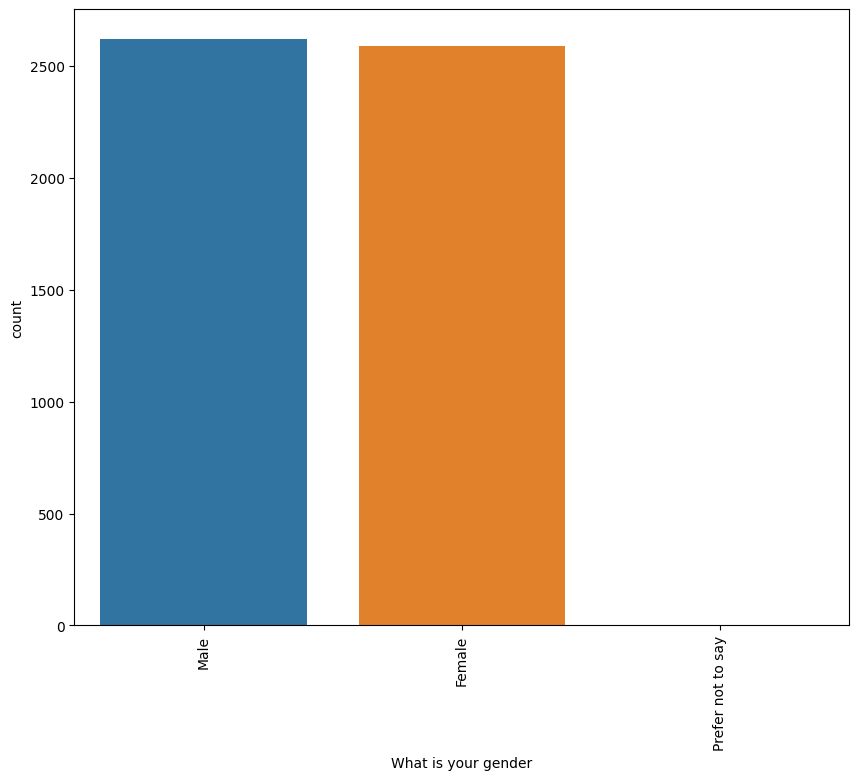

Title of course studied


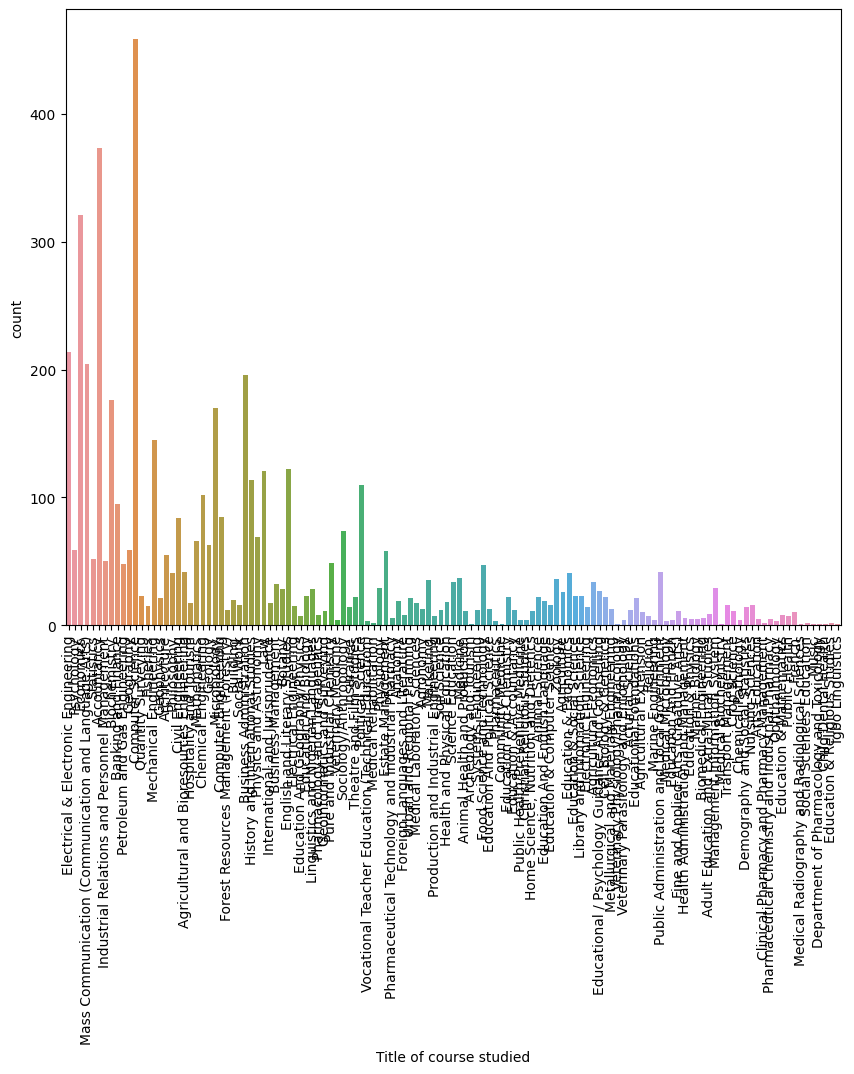

What is your highest level of education?


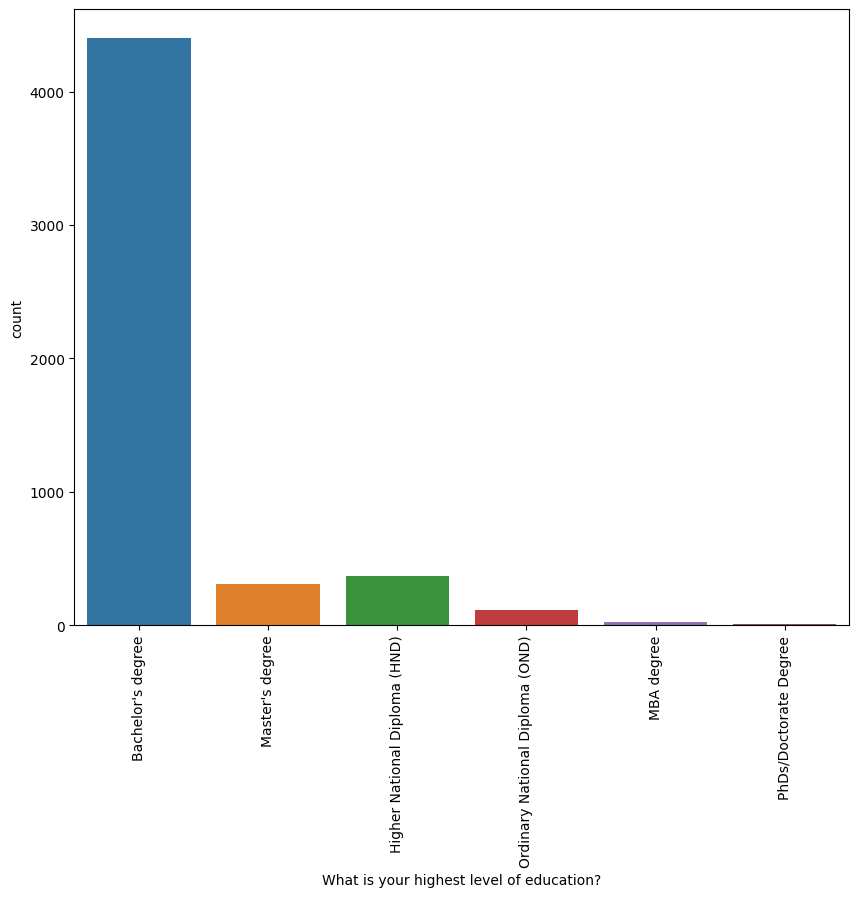

What best describes your current status?


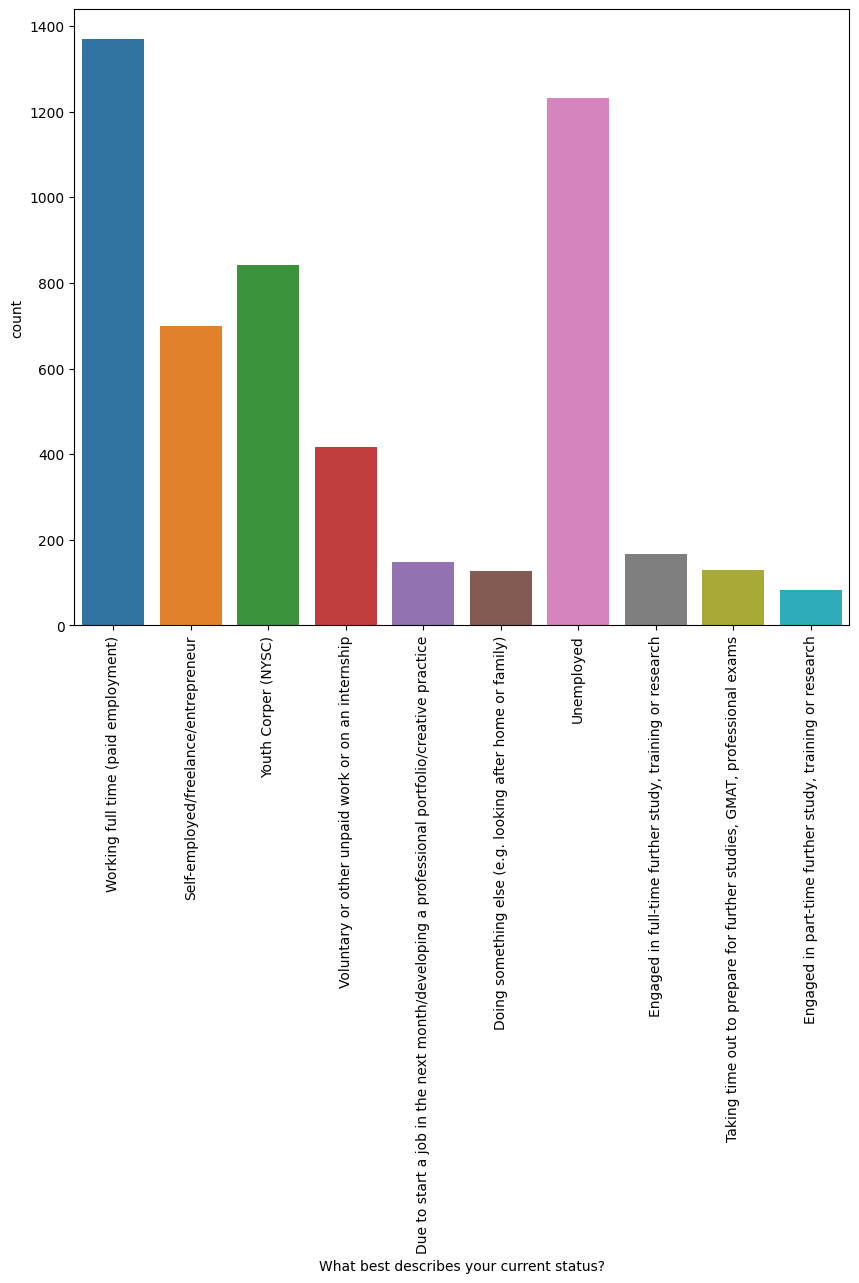

Thinking about your first employment after graduation, what was your job level?


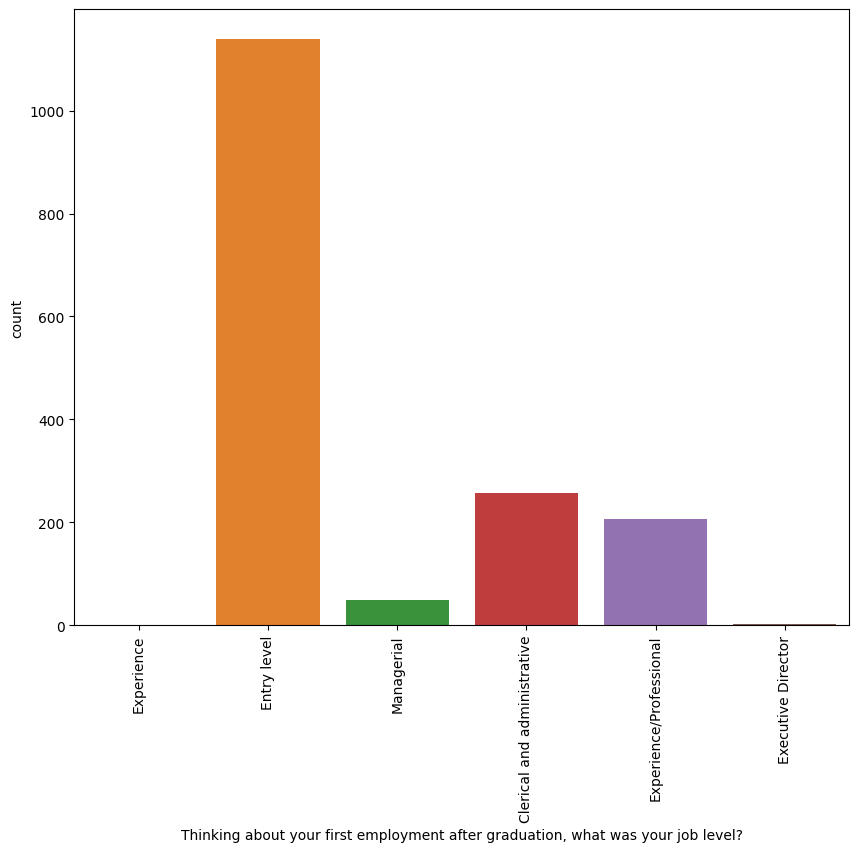

What is/was your job role?


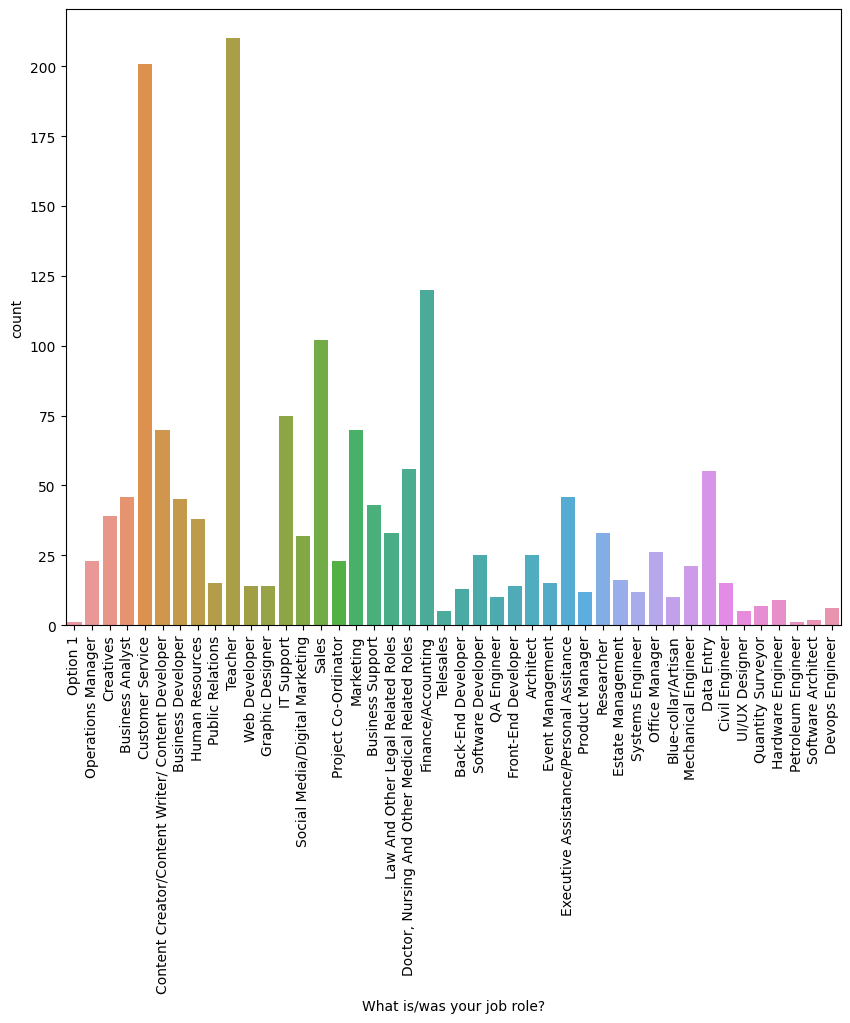

Still thinking about your first employment, what is/was your monthly income level?


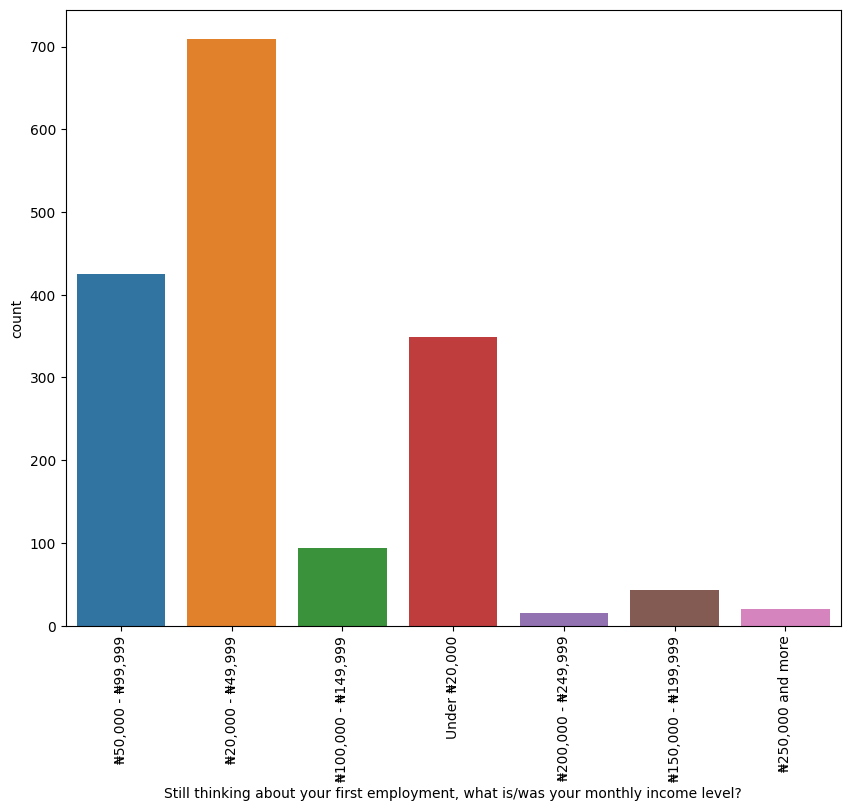

Did you need your higher education qualification to get your first job (the actual qualification, not the subject of study)?


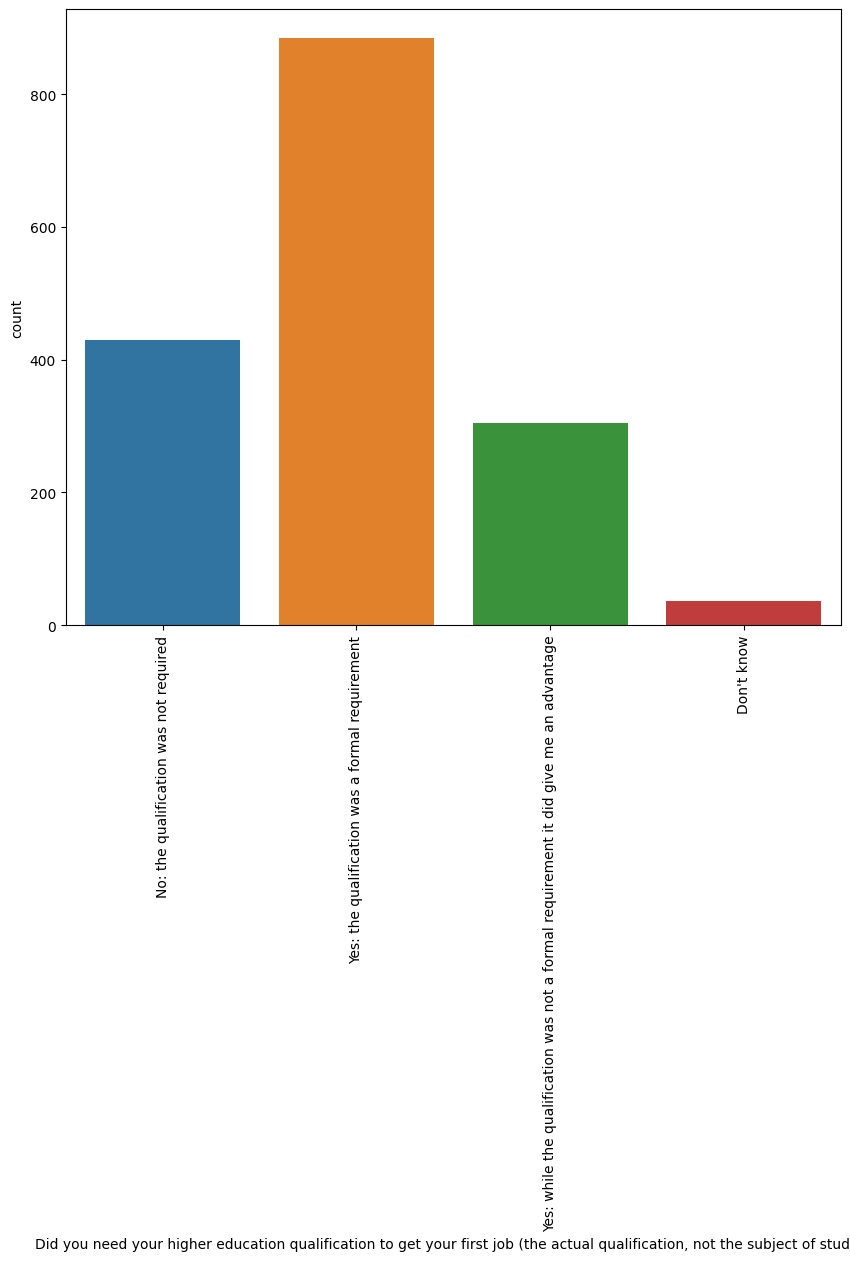

What was the most significant reason for deciding to take your first job?


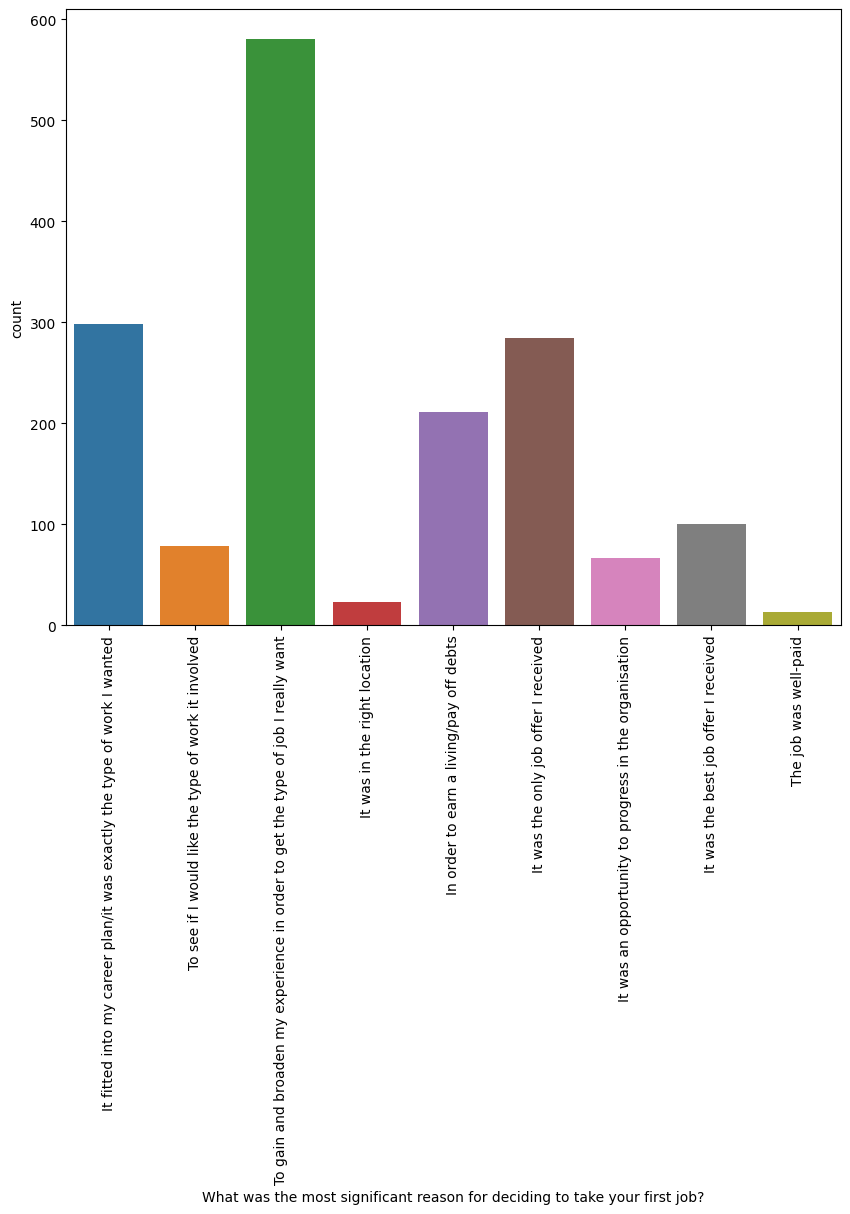

In [ ]:
import seaborn as sns
# Plotting categorical features
for cat in cat_cols_first_job:
    print(cat)
    plt.figure(figsize=(10,8))
    sns.countplot(x=cat, data=df_no_duplicates)
    plt.xticks(rotation=90)
    plt.show()

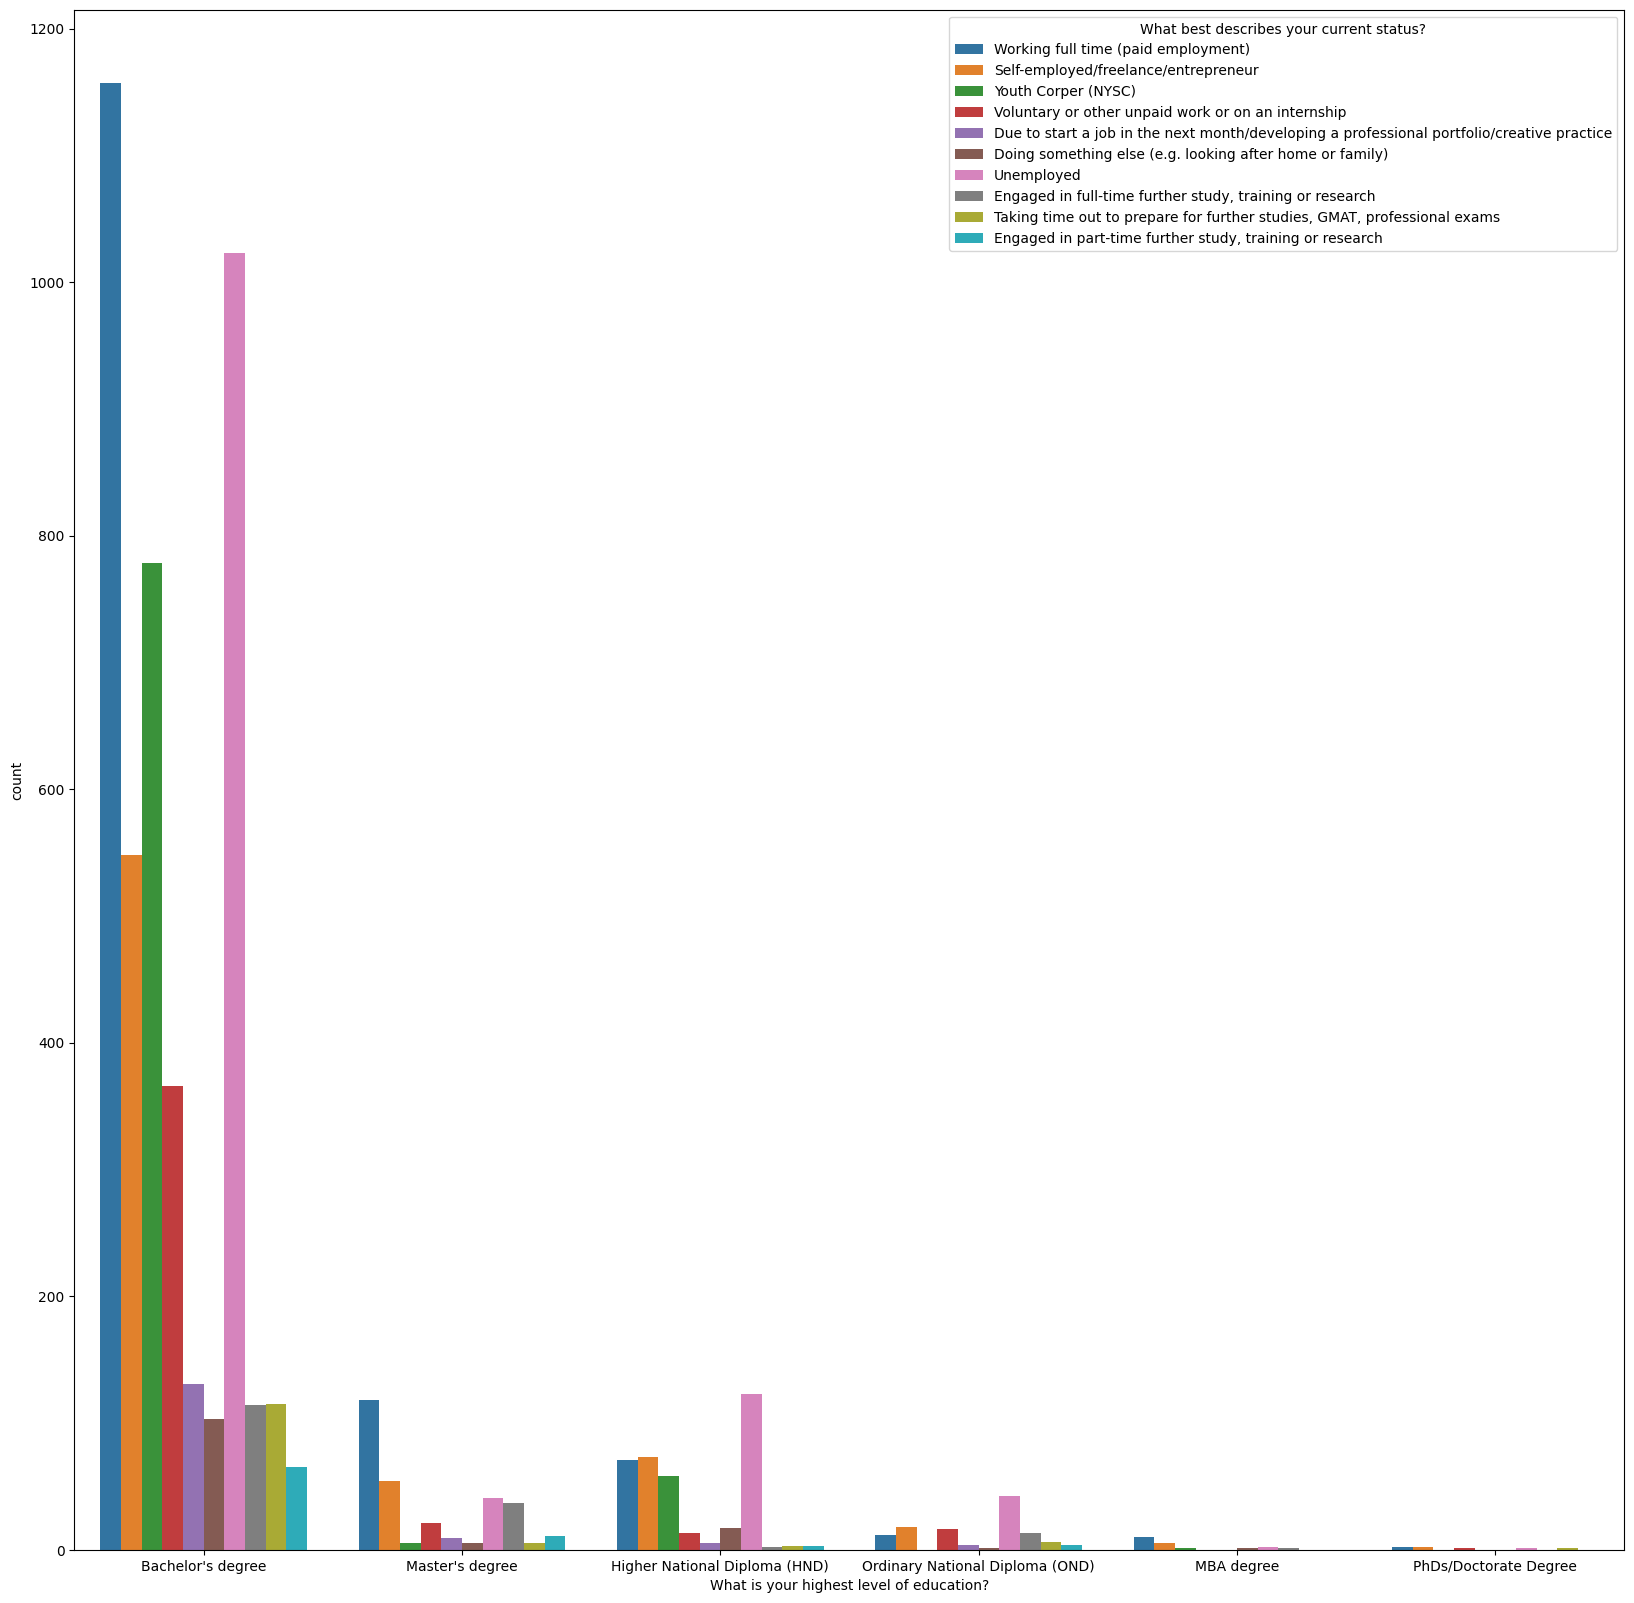

In [ ]:
plt.figure(figsize=(20, 20))
sns.countplot(data=df_no_duplicates, x='What is your highest level of education?', hue='What best describes your current status?')
plt.show()

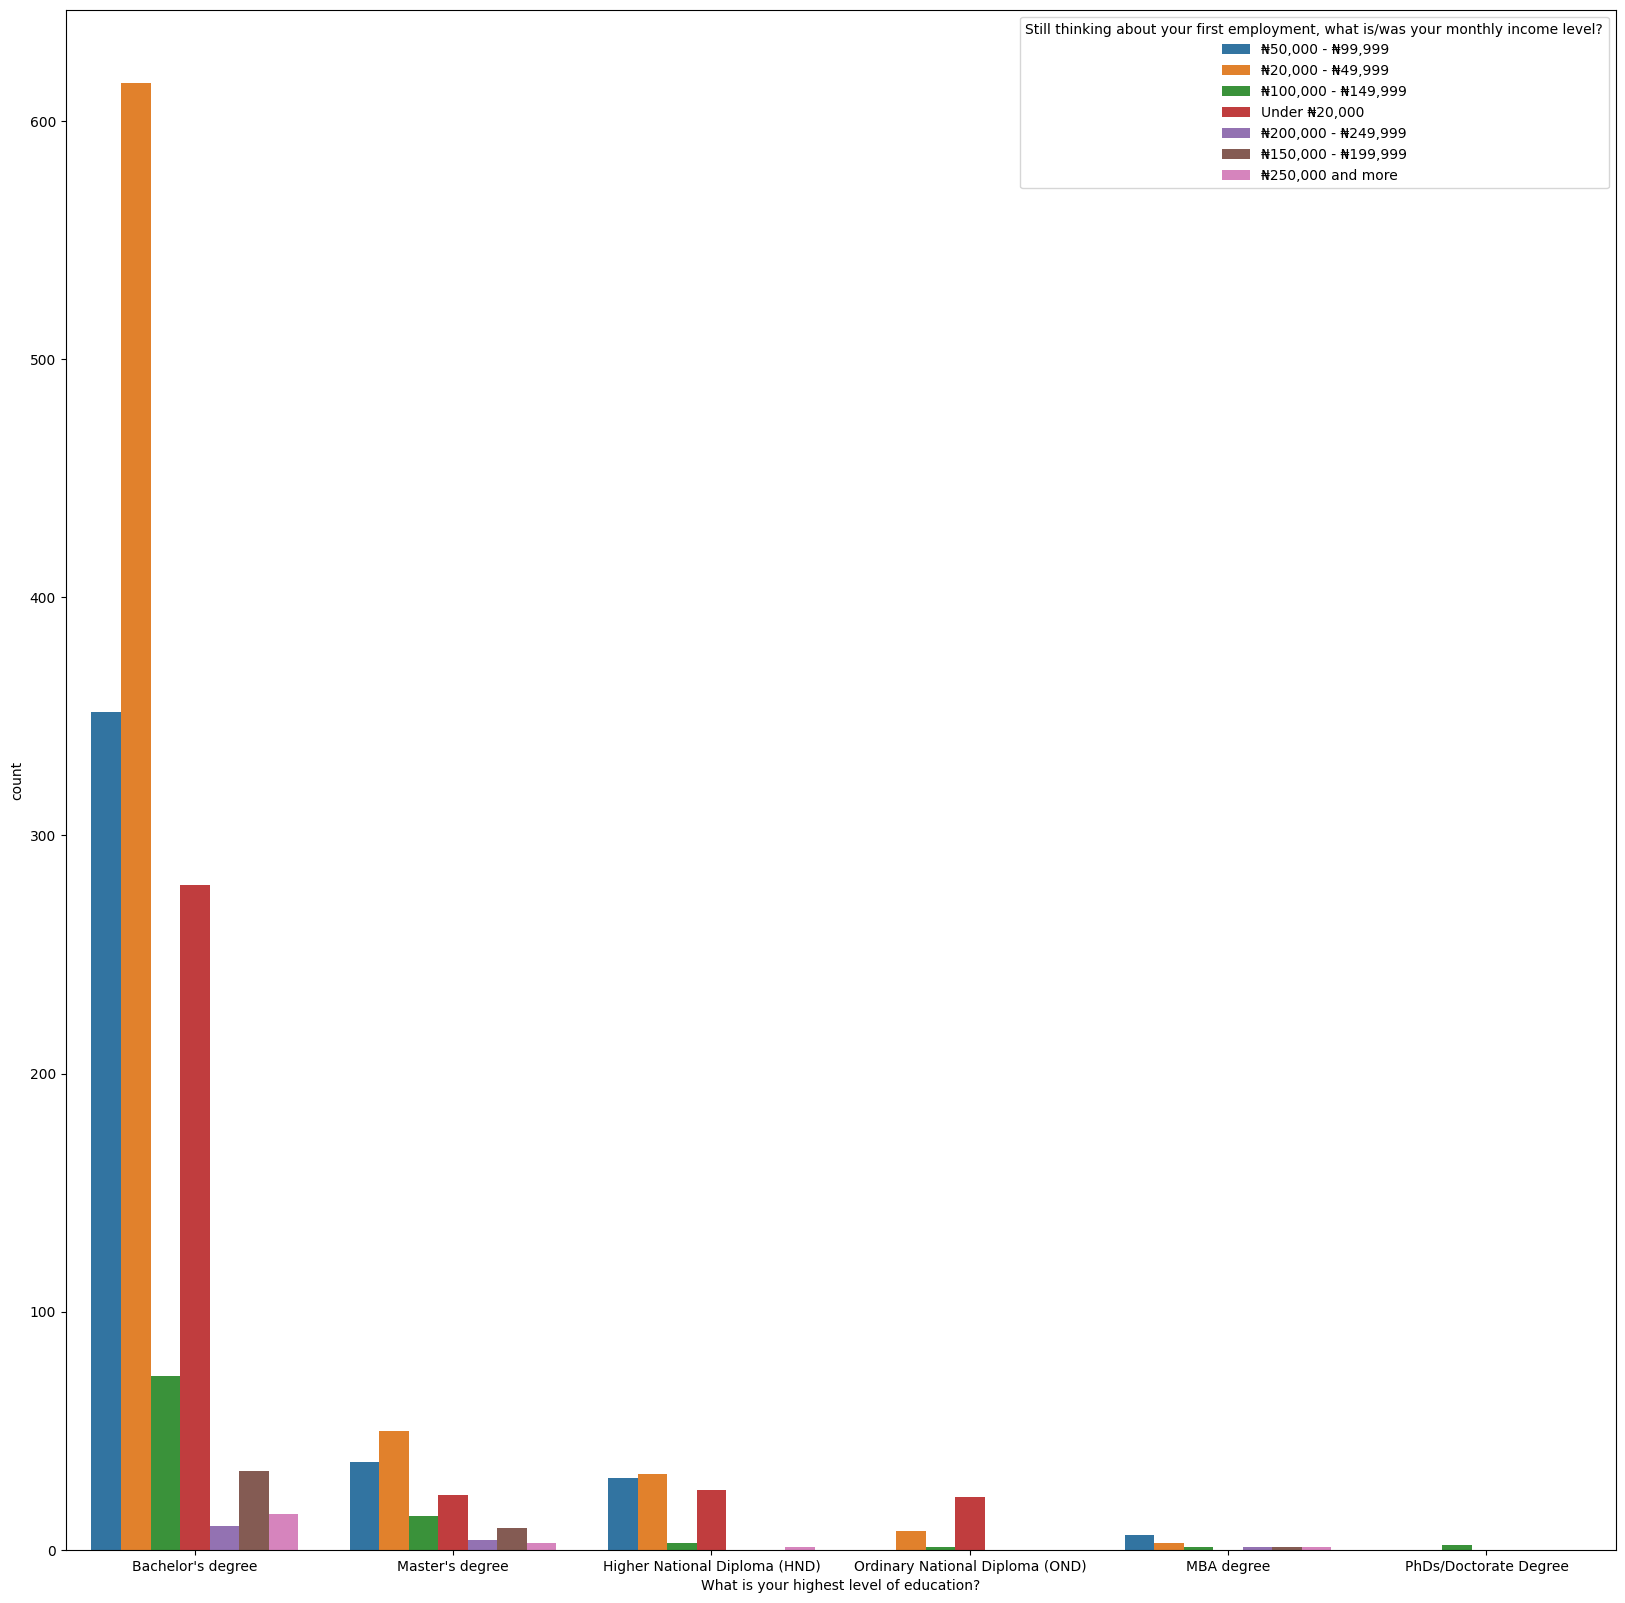

In [ ]:
plt.figure(figsize=(20, 20))
sns.countplot(data=df_no_duplicates, x='What is your highest level of education?', hue='Still thinking about your first employment, what is/was your monthly income level?')
plt.show()

# Analysing Current Job


In [ ]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5218
Data columns (total 36 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   What is your gender                                                                                                           5217 non-null   object 
 1   Year of graduation                                                                                                            5217 non-null   int64  
 2   Title of course studied                                                                                                       5217 non-null   object 
 3   Polytechnic/University attended                                                                                  

In [ ]:
cat_cols_current_job = ['What is your gender' , 'What is your highest level of education?' , 'What best describes your current status?' ,'Thinking about your current employment, what is your job level?' , 'What is your job role?' , 'What is your current monthly income level?' ,'Did you need your higher education qualification to get this job (the actual qualification, not the subject of study)?' , 'What was the most significant reason for deciding to take this job?' ,'Which employer in the country do you think offers the best opportunities for graduates?' , 'Reason why?' , 'As far as you are aware, what was most important to your current employer about your qualification?','Thinking about your current employment, did you work for your employer before or during your  higher education study?' , 'My course of study prepared me well for employment' , 'My course of study prepared me well for further studies' , 'Which of these skills/knowledge did your higher education prepare you for?' ]

What is your gender


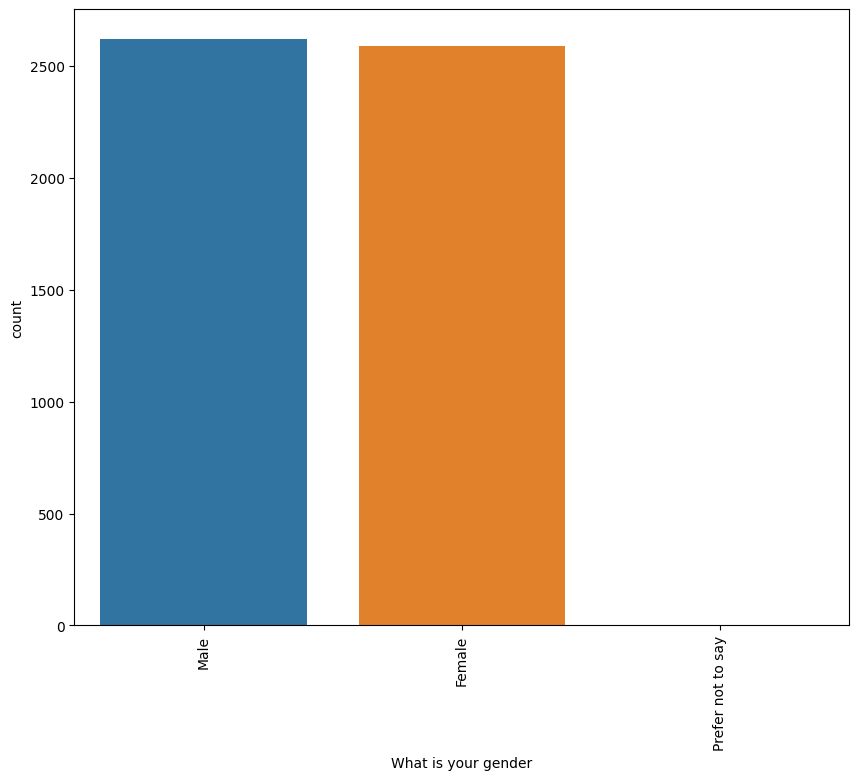

What is your highest level of education?


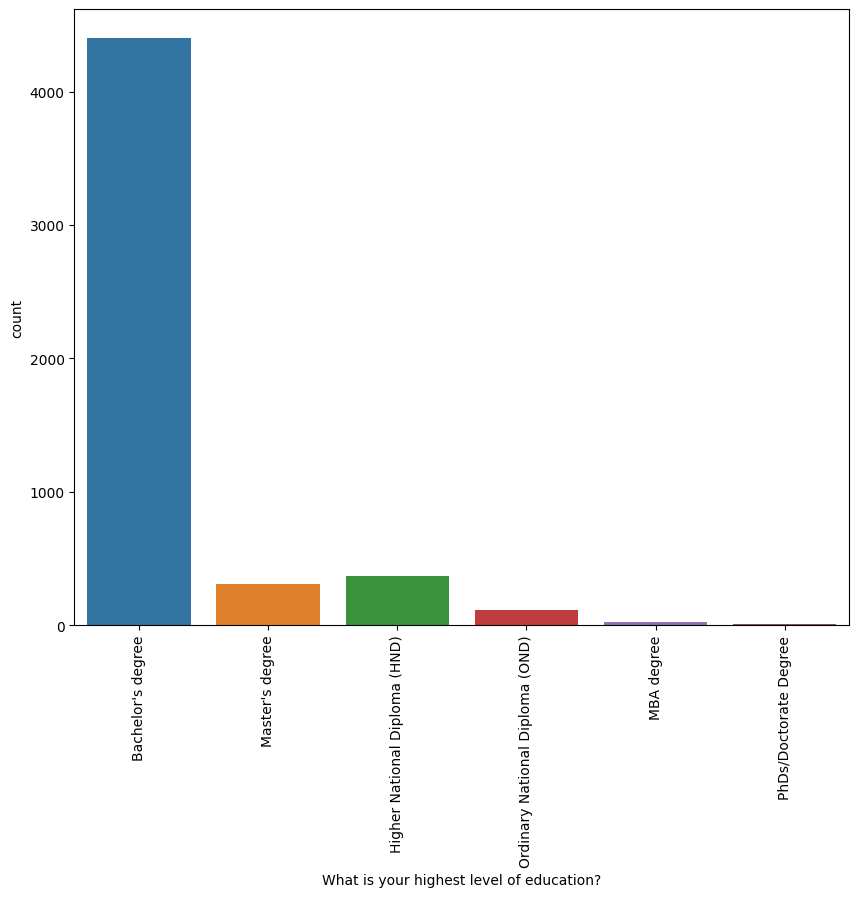

What best describes your current status?


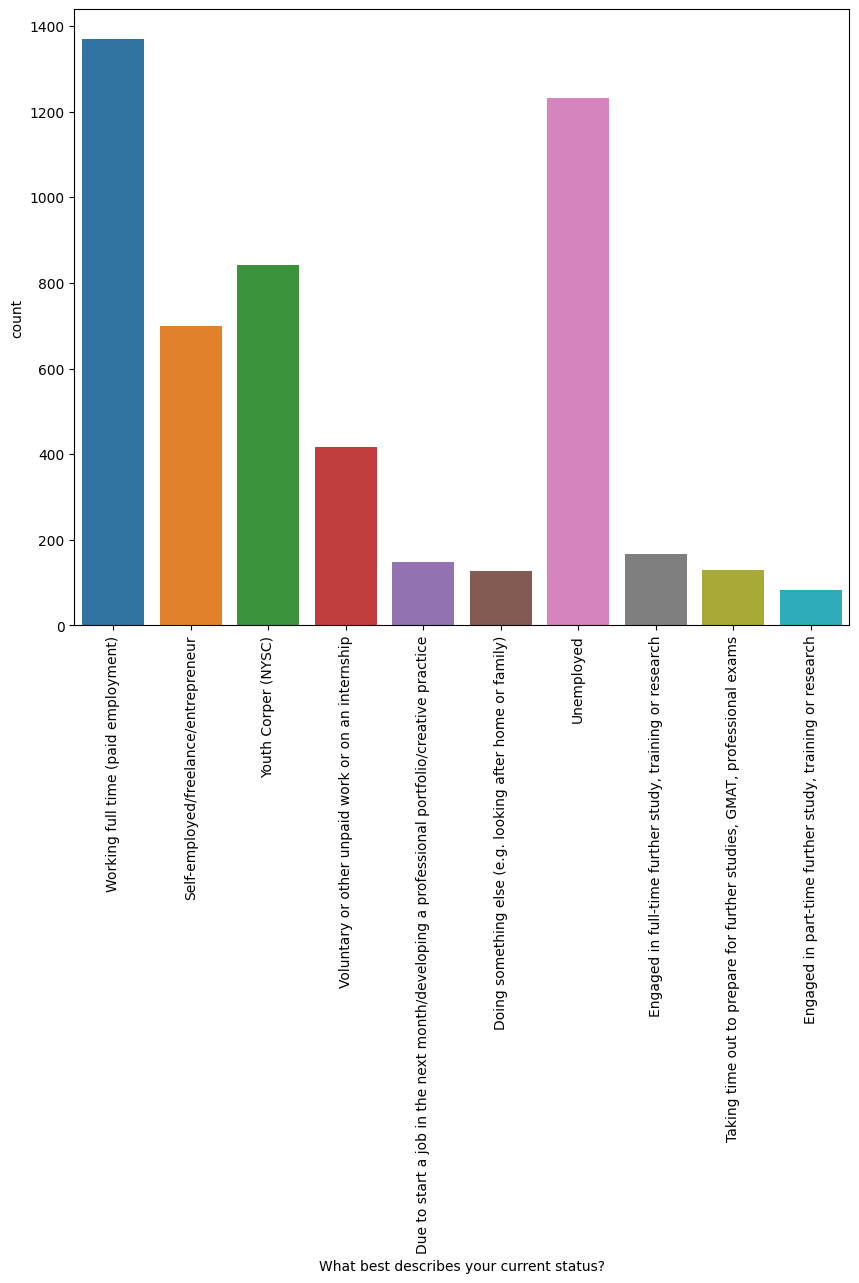

Thinking about your current employment, what is your job level?


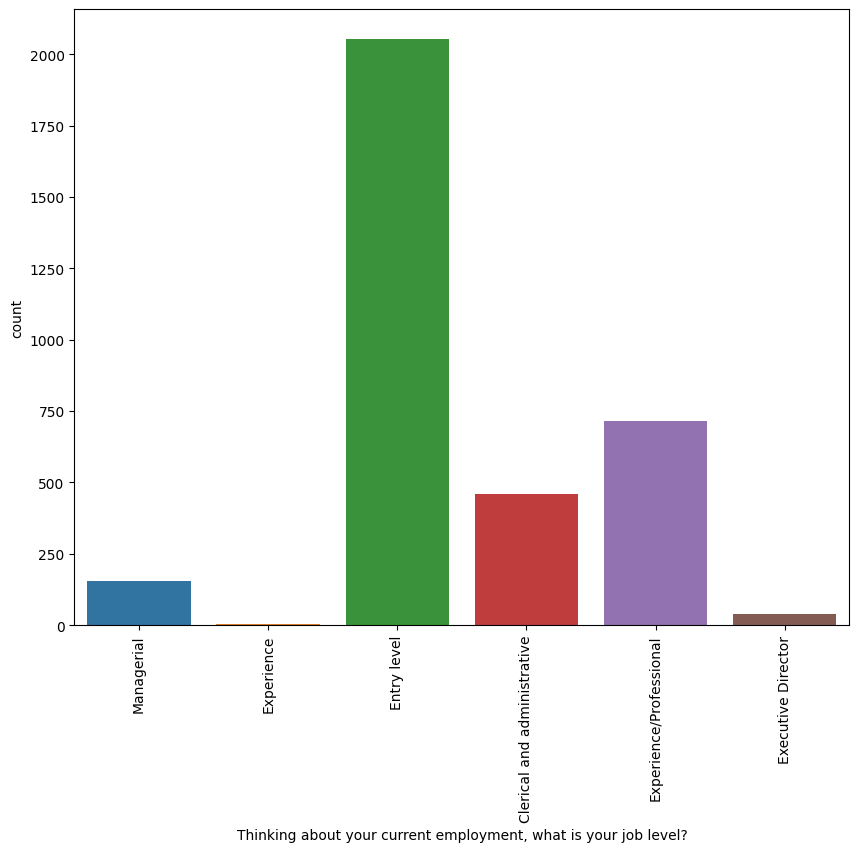

What is your job role?


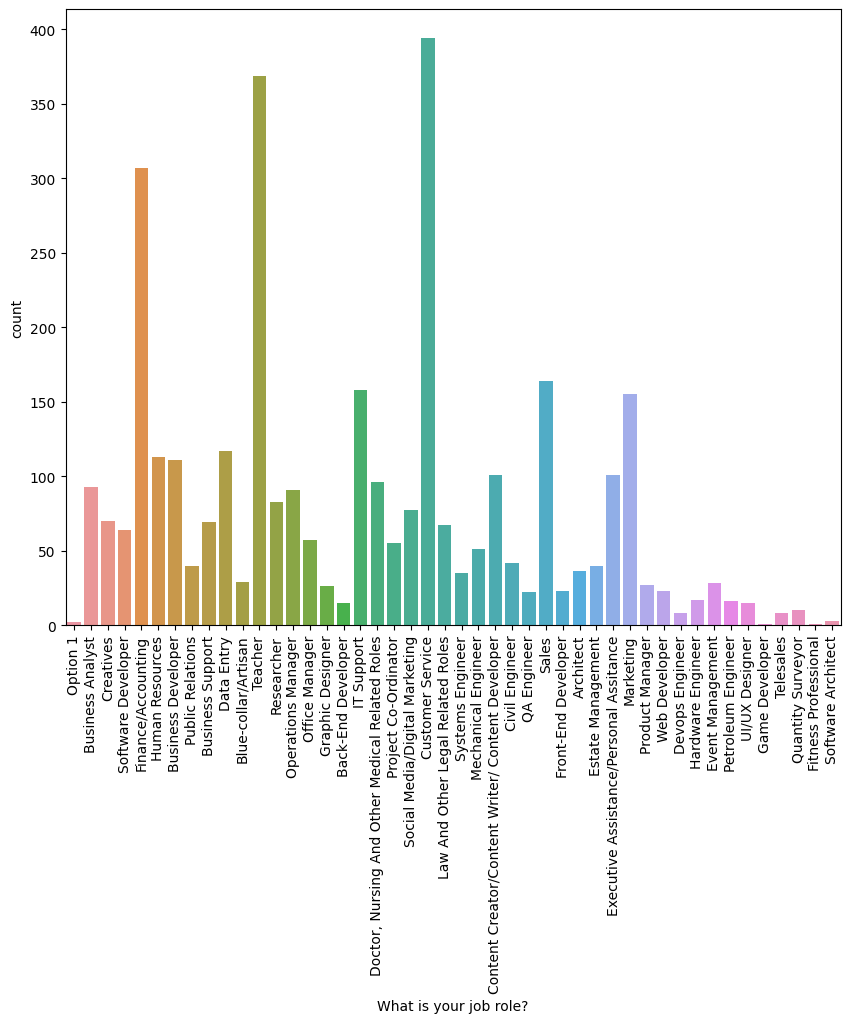

What is your current monthly income level?


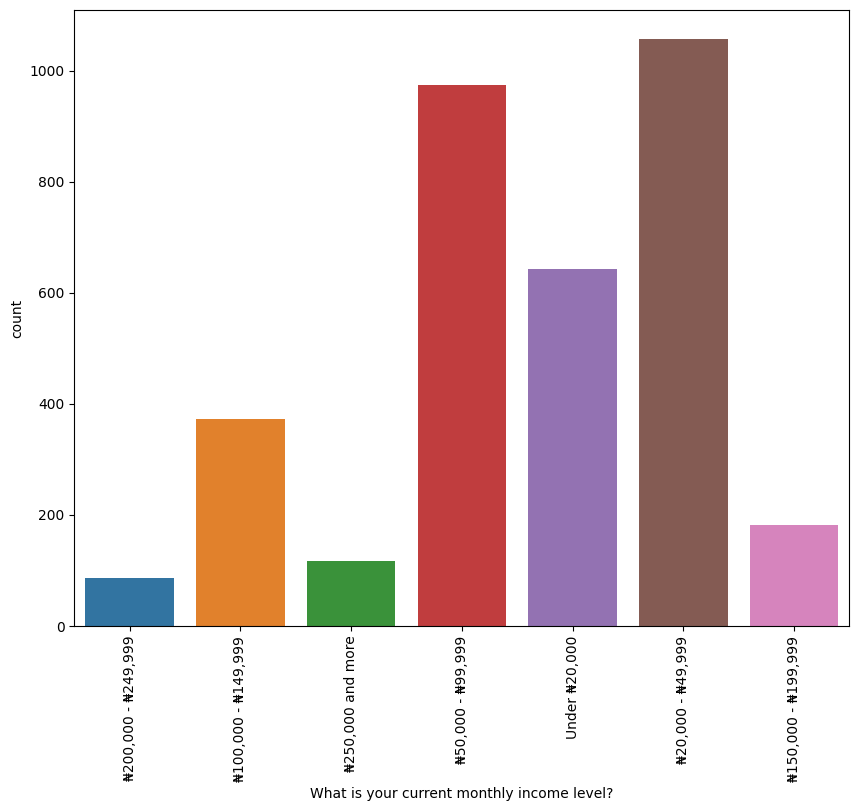

Did you need your higher education qualification to get this job (the actual qualification, not the subject of study)?


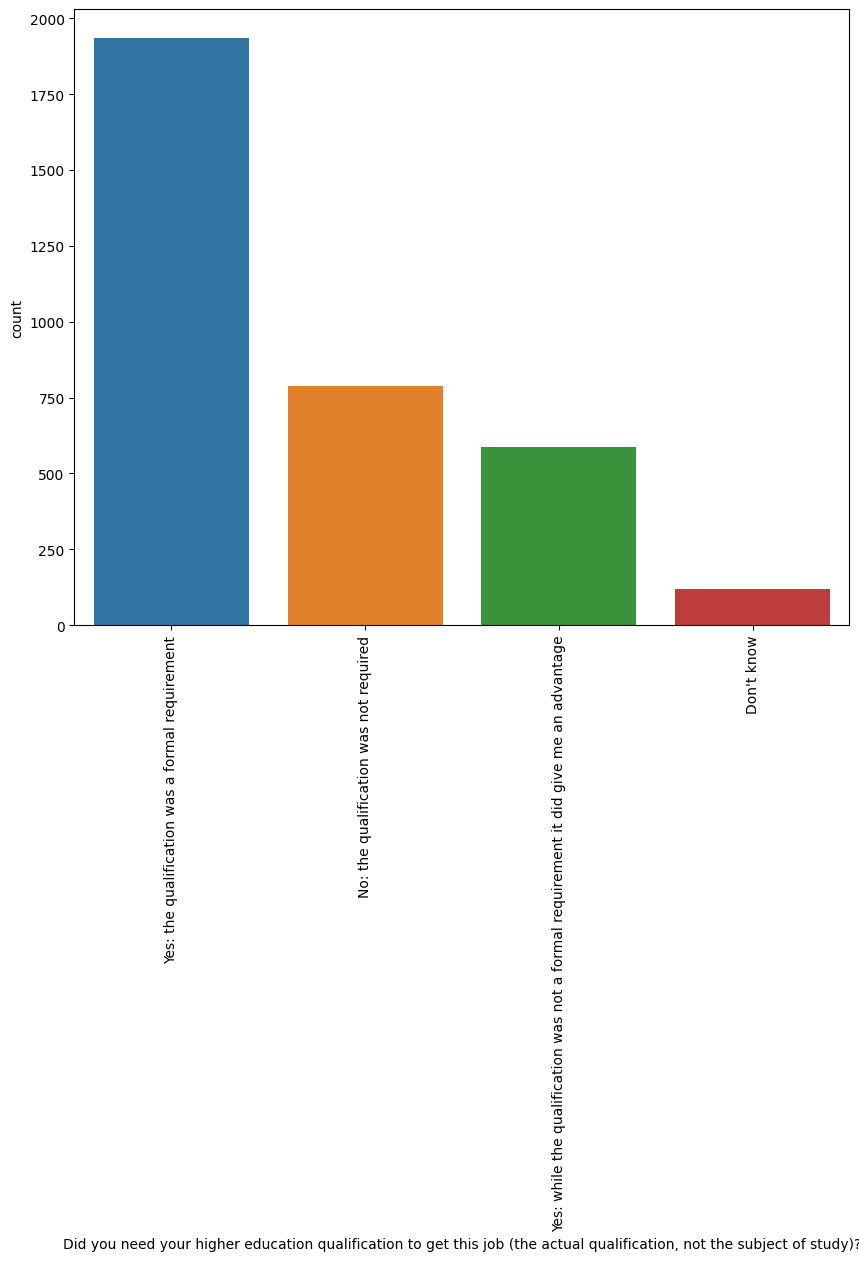

What was the most significant reason for deciding to take this job?


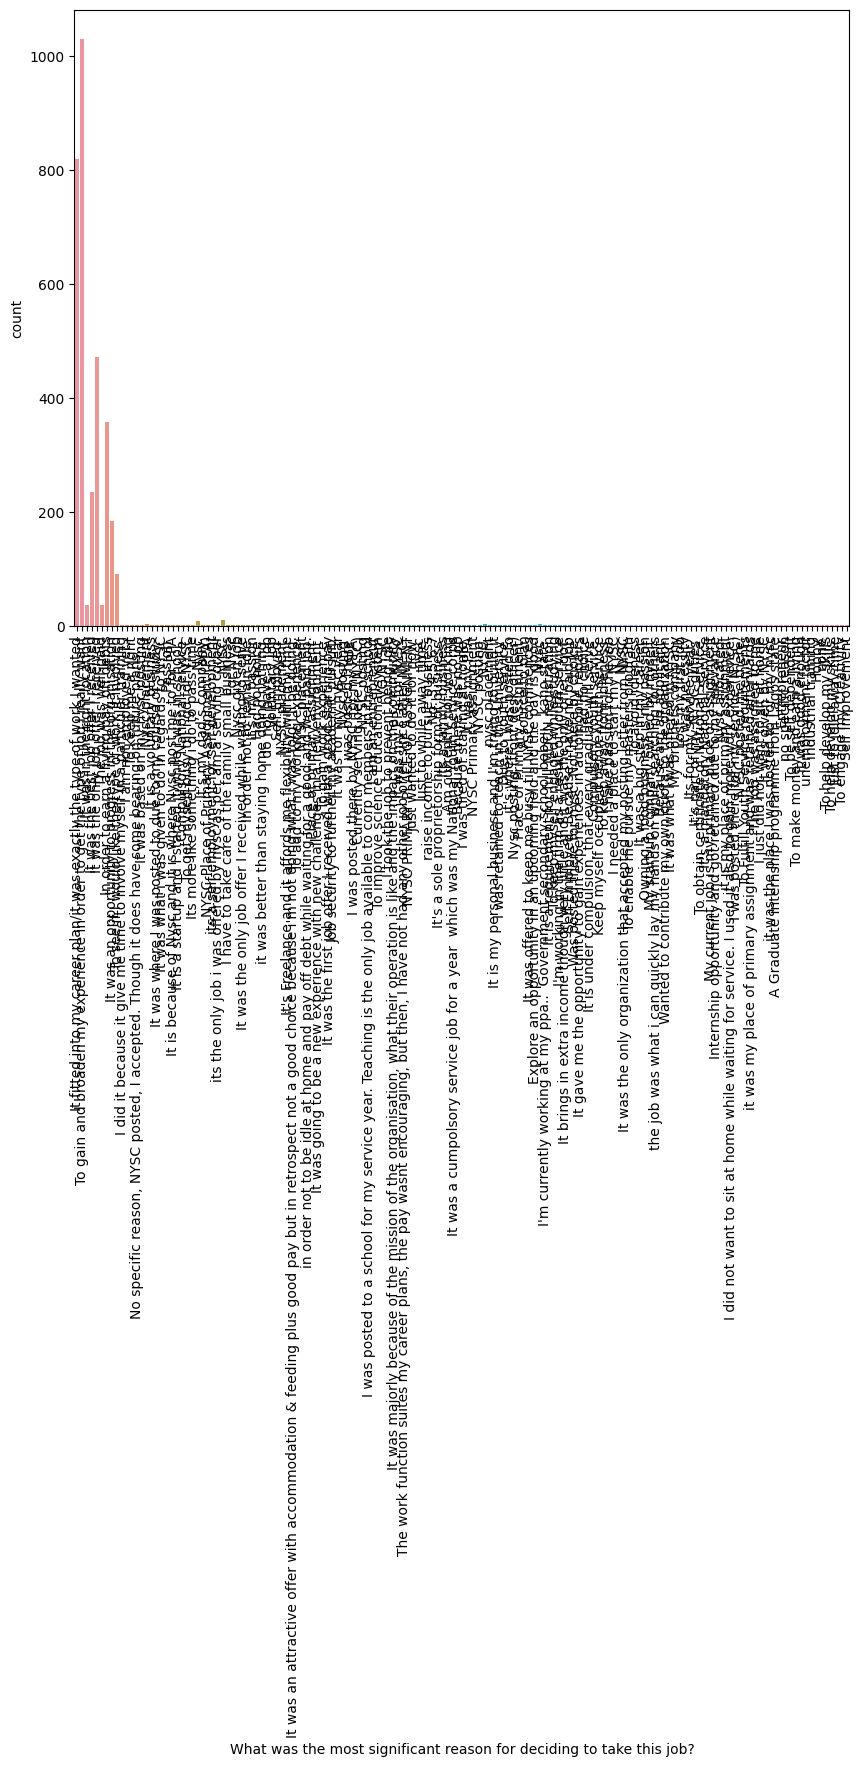

Which employer in the country do you think offers the best opportunities for graduates?


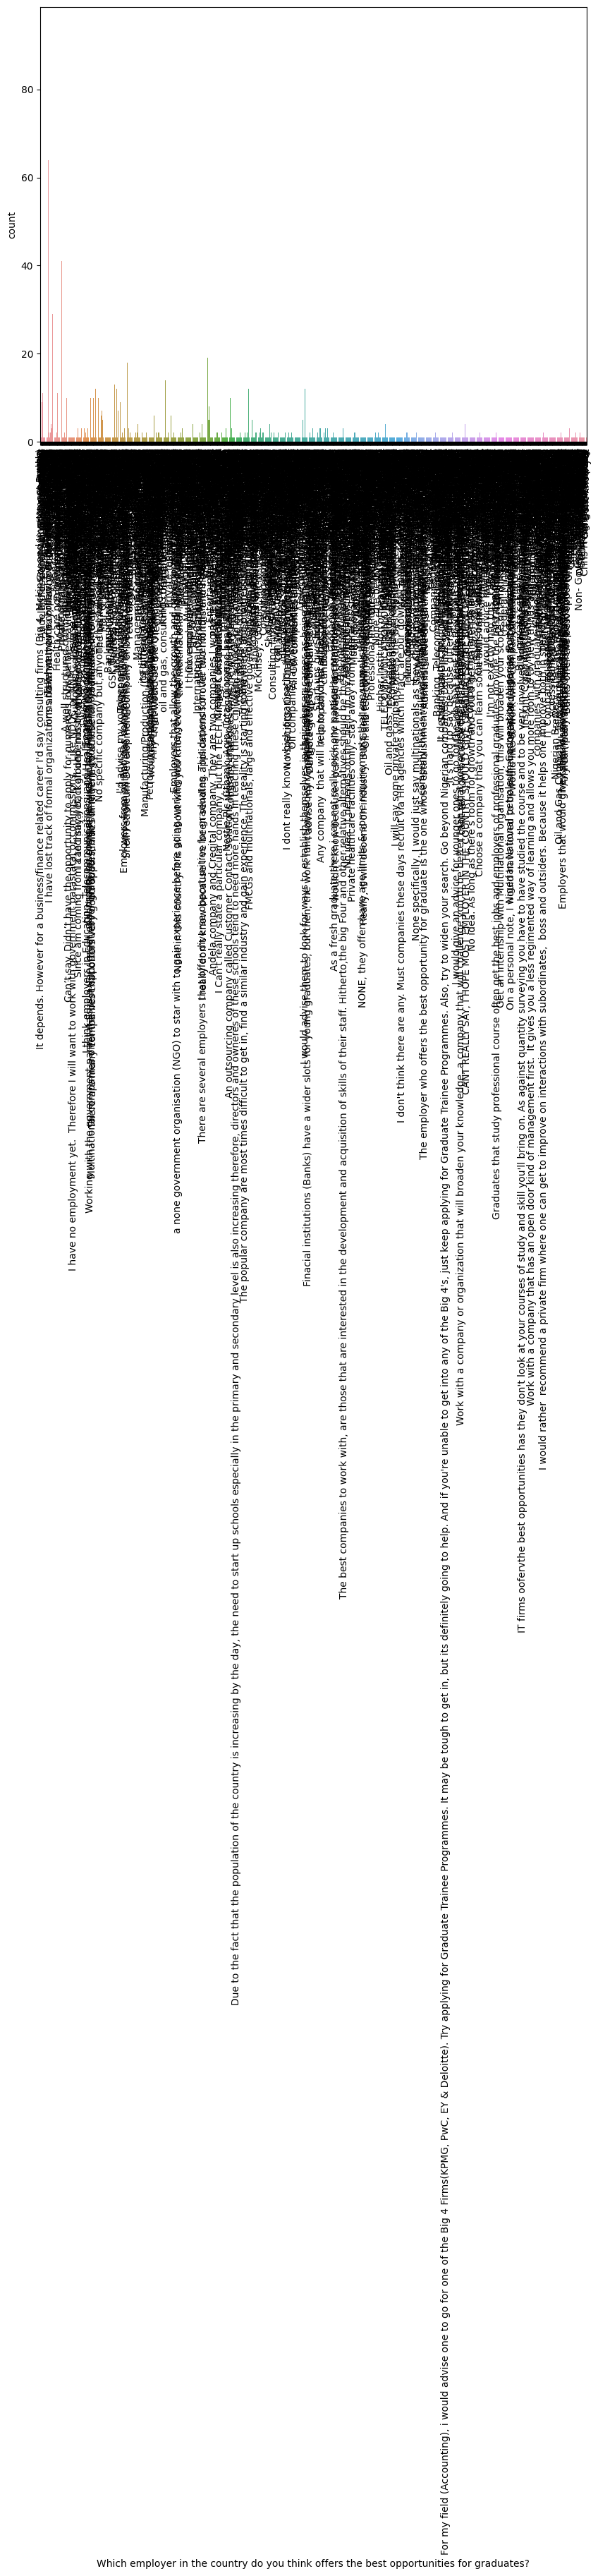

Reason why?


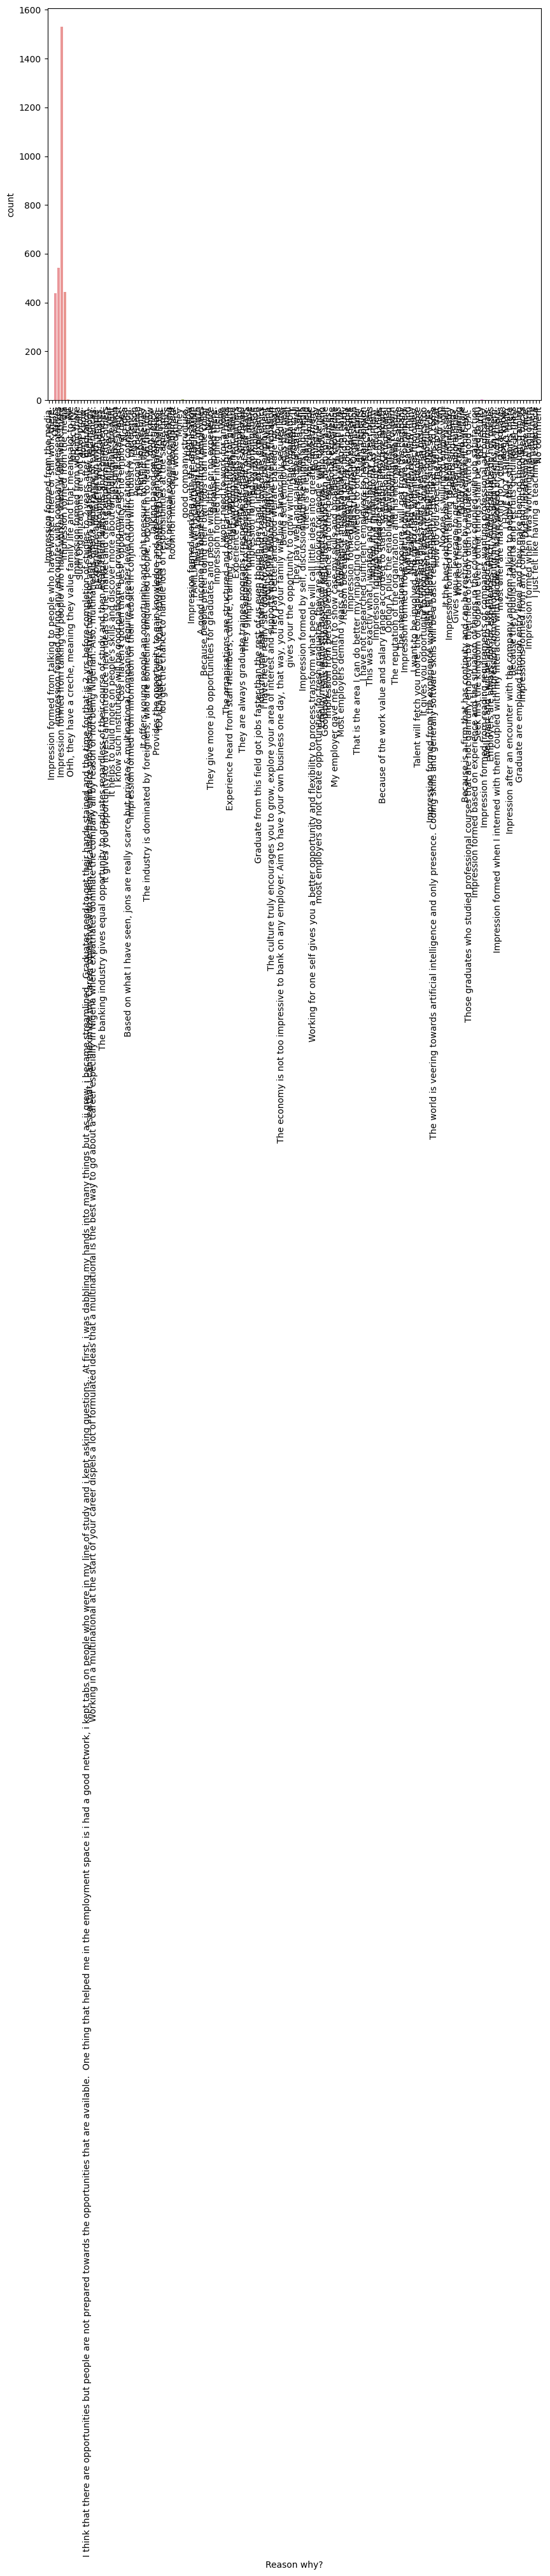

As far as you are aware, what was most important to your current employer about your qualification?


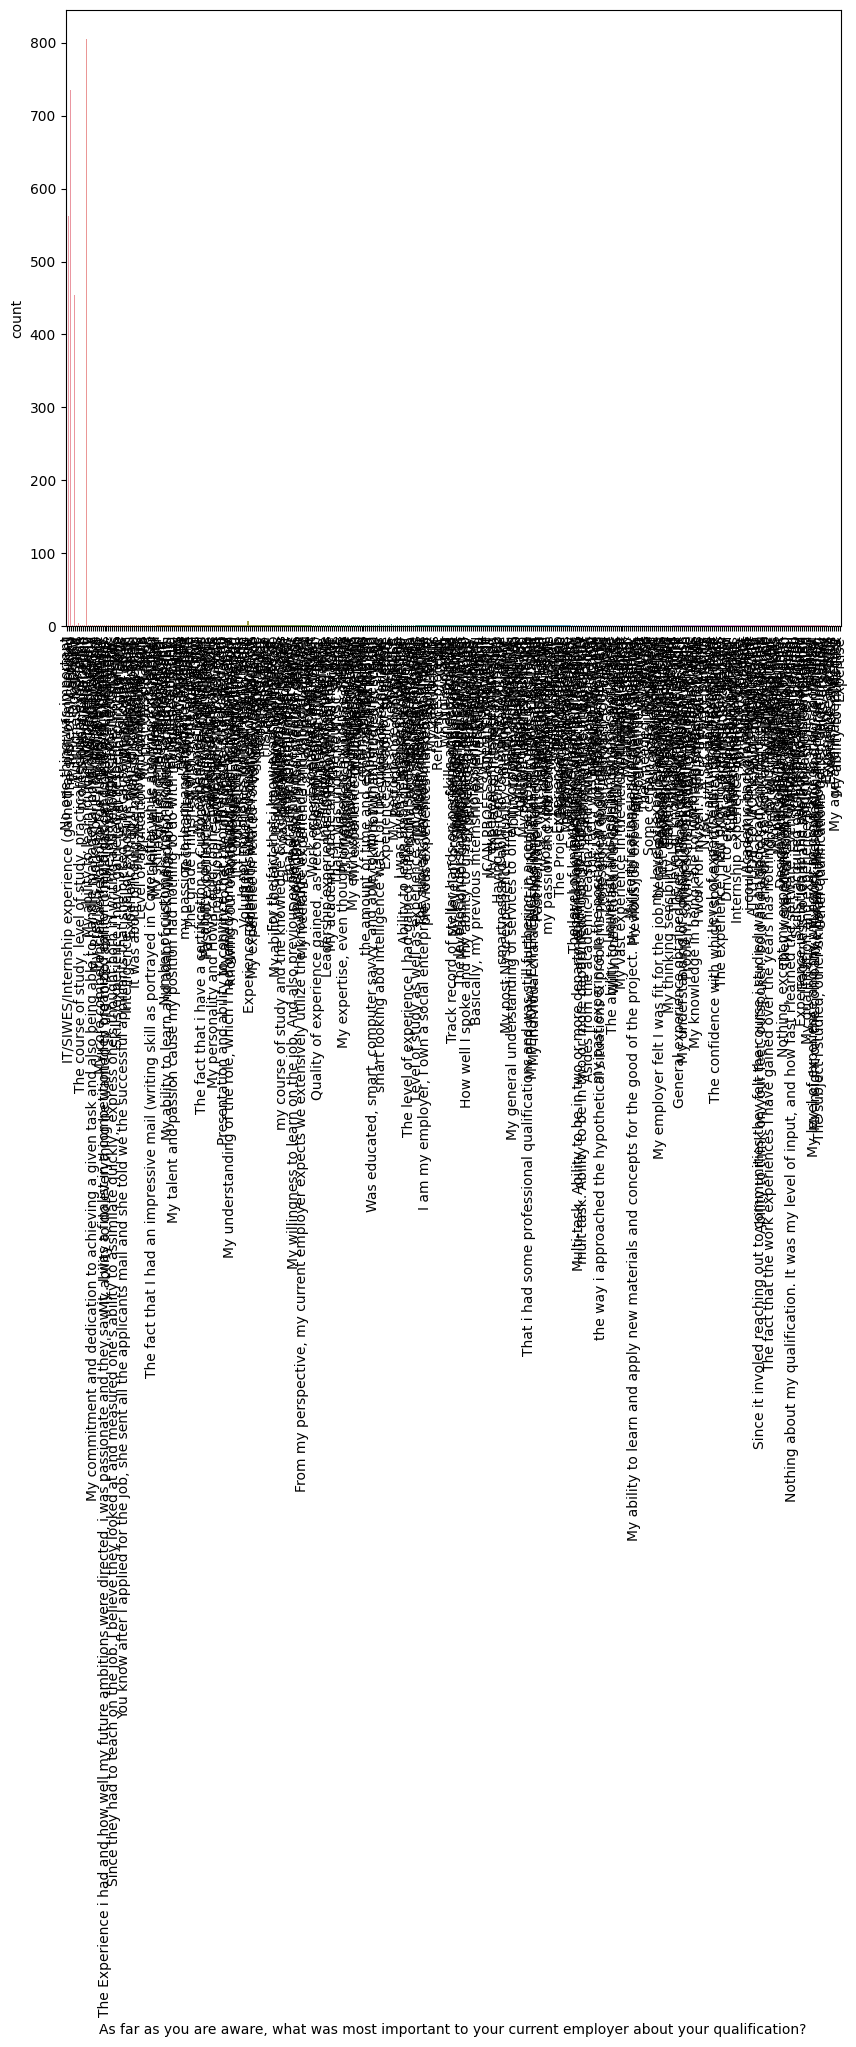

Thinking about your current employment, did you work for your employer before or during your  higher education study?


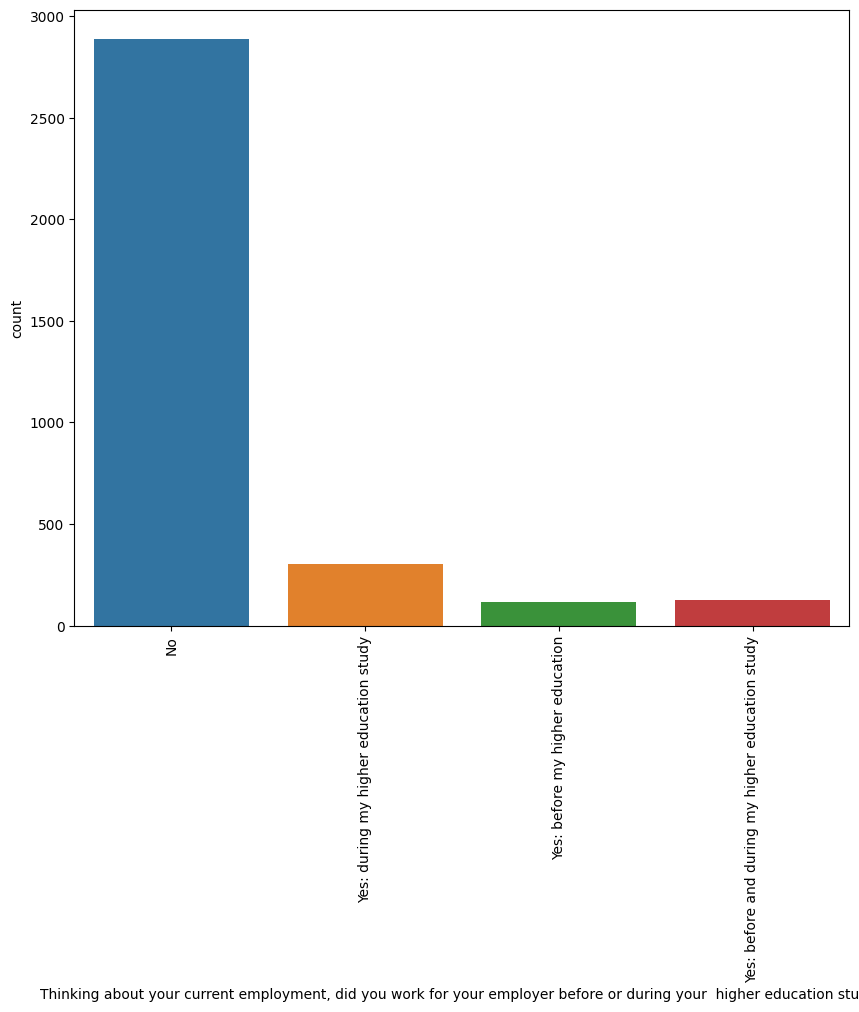

My course of study prepared me well for employment


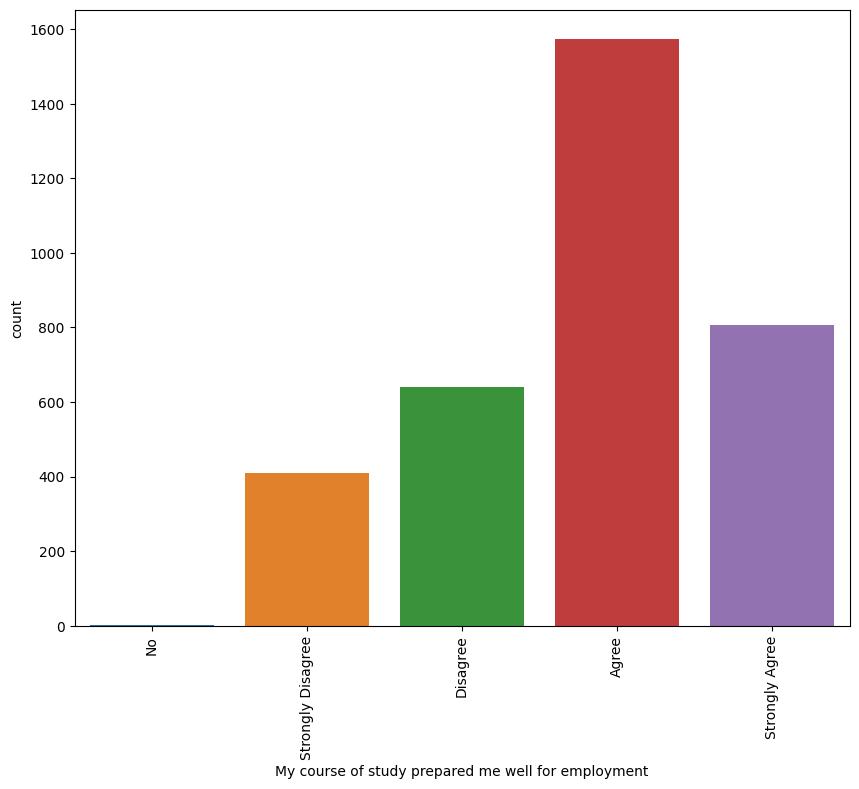

My course of study prepared me well for further studies


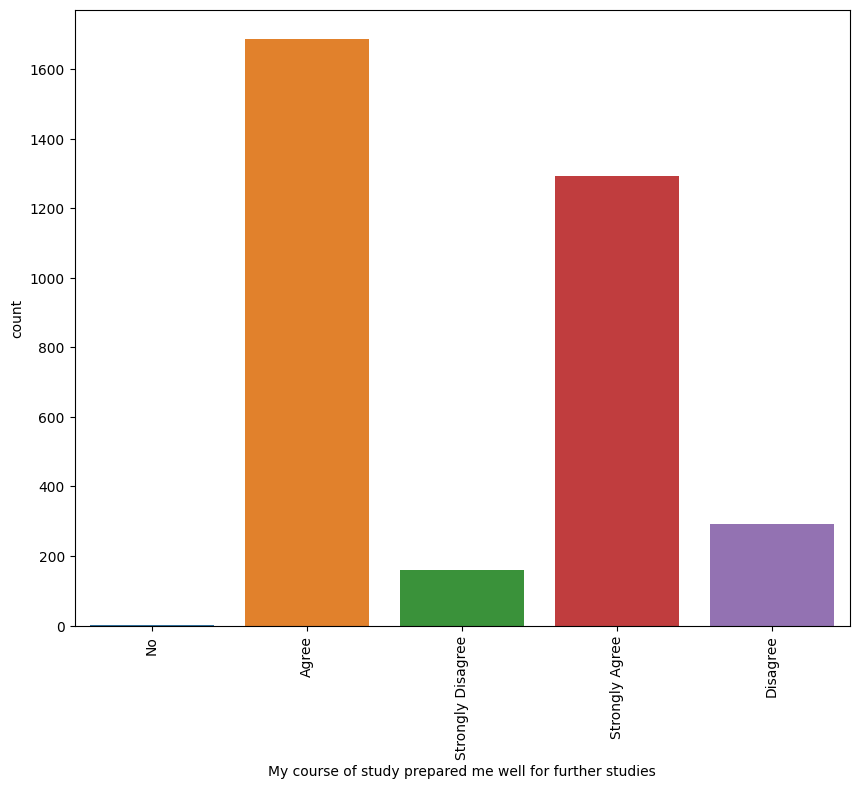

Which of these skills/knowledge did your higher education prepare you for?


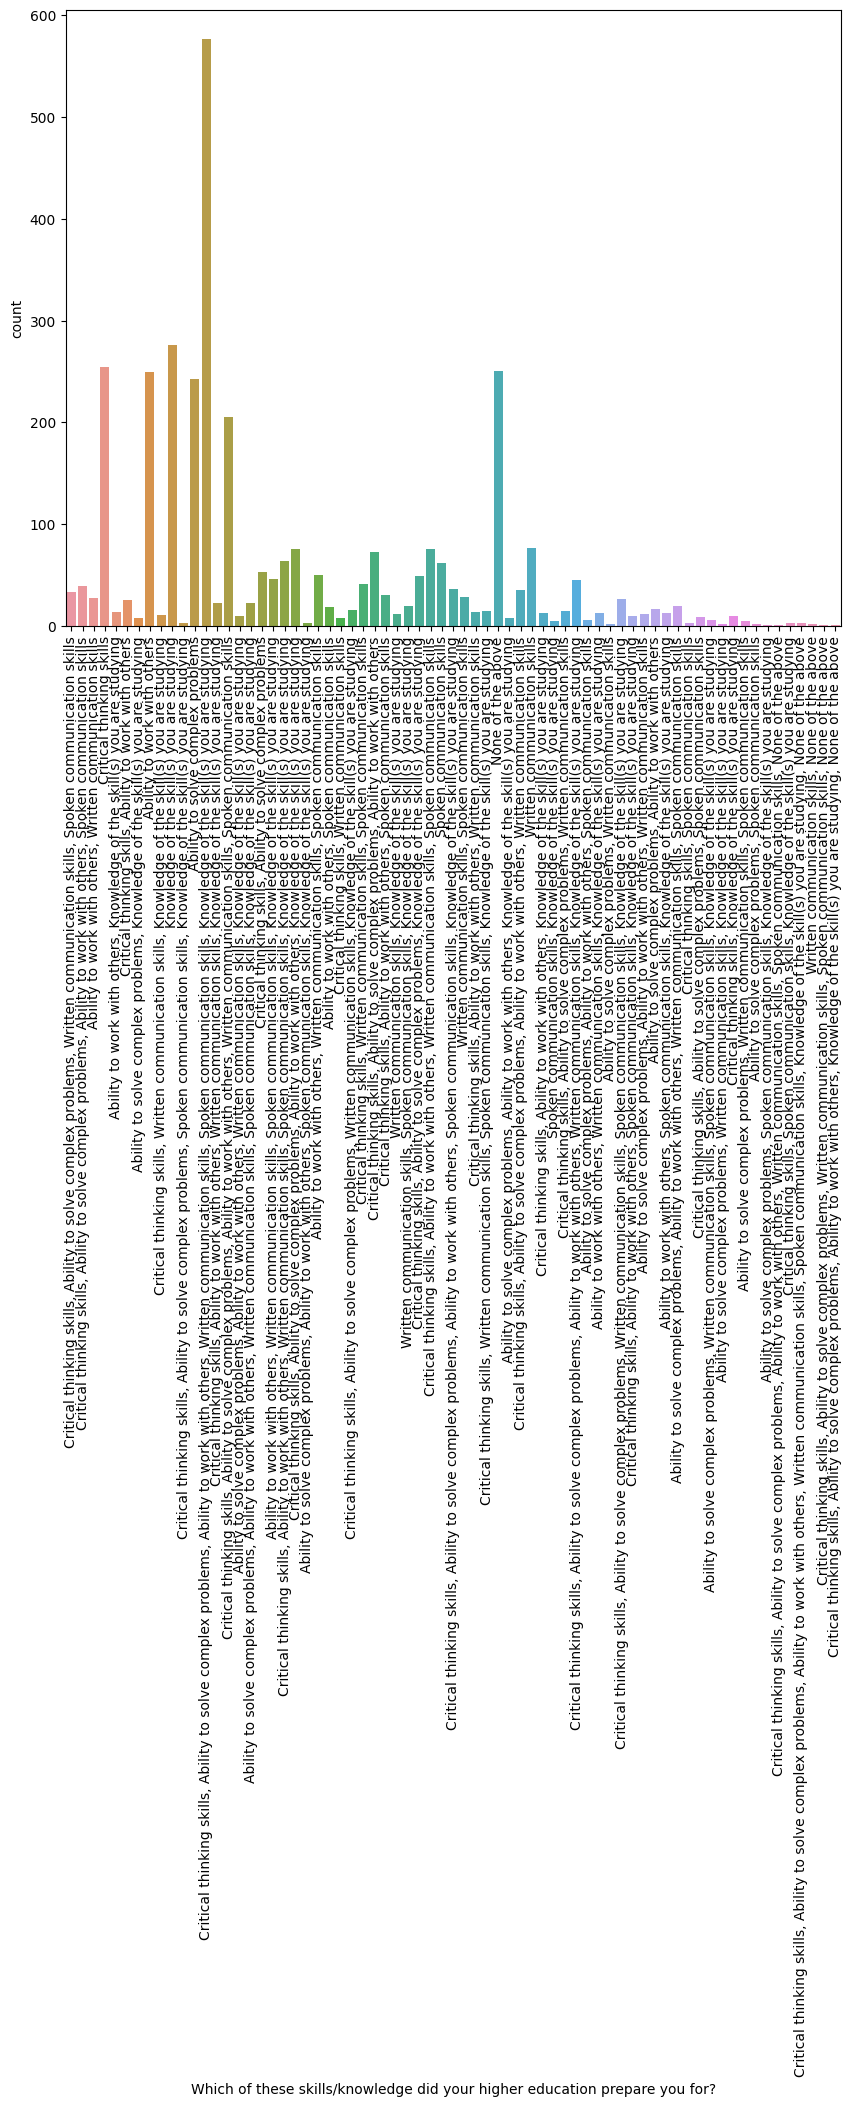

In [ ]:
for cat_col_current in cat_cols_current_job:
    print(cat_col_current)
    plt.figure(figsize=(10,8))
    sns.countplot(x=cat_col_current, data=df_no_duplicates)
    plt.xticks(rotation=90)
    plt.show()

I am leaning towards making a model that can predict if the lifestyle of a person will be good or not and give an estimate salary .

For Example ; we put that I am in 3rd year of college and I will be doing NYSC , my degree is about engineering and I have done an internship . Then we will generate a result of as you could have a (predicted salary) as well as a good livelihood.

So in Feature Engineering i will be aiming to remove all the unnecessary columns as well as try to generate as much info from columns as possible .

# Feature Engineering

In [ ]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5218
Data columns (total 36 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   What is your gender                                                                                                           5217 non-null   object 
 1   Year of graduation                                                                                                            5217 non-null   int64  
 2   Title of course studied                                                                                                       5217 non-null   object 
 3   Polytechnic/University attended                                                                                  

In [ ]:
df = df_no_duplicates.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5218
Data columns (total 36 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   What is your gender                                                                                                           5217 non-null   object 
 1   Year of graduation                                                                                                            5217 non-null   int64  
 2   Title of course studied                                                                                                       5217 non-null   object 
 3   Polytechnic/University attended                                                                                  

# Gender column

In [ ]:
df = df.rename(columns={'What is your gender': 'Gender'})
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

## Curse studied

In [ ]:
df = df.rename(columns={'Title of course studied': 'Course'})
value_counts = df['Course'].value_counts()
value_counts

Computer Science                                        459
Accountancy                                             373
Economics                                               321
Electrical & Electronic Engineering                     214
Mass Communication (Communication and Language Arts)    204
                                                       ... 
Music                                                     1
Department of Pharmacology and Toxicology                 1
Child Dental Health                                       1
Archeology and Tourism                                    1
Igbo Linguistics                                          1
Name: Course, Length: 127, dtype: int64

In [ ]:
df['Course'] = df['Course'].str.replace('.*Engineering.*', 'Engineering', regex=True, case=False)
df['Course'] = df['Course'].str.replace('.*Education.*' , 'Education' , regex=True , case=False)
value_counts = df['Course'].value_counts()
print(value_counts)

Engineering                           791
Computer Science                      459
Accountancy                           373
Economics                             321
Education                             314
                                     ... 
Archeology and Tourism                  1
Community Medicine                      1
Medical Biochemistry                    1
Veterinary Physiology/Pharmacology      1
Igbo Linguistics                        1
Name: Course, Length: 94, dtype: int64


In [ ]:
pd.set_option('display.max_rows', None)  # Display all rows

In [ ]:
print(value_counts)

Engineering                                             791
Computer Science                                        459
Accountancy                                             373
Economics                                               321
Education                                               314
Mass Communication (Communication and Language Arts)    204
Business Administration                                 196
Biochemistry                                            176
Microbiology                                            170
English and Literary Studies                            122
Law                                                     121
History and International Studies                       114
Political Science                                       110
Banking and Finance                                      95
Sociology/Anthropology                                   74
Physics and Astronomy                                    69
Mathematics                             

*{Zoology , Veterinary Medicine ,Veterinary Parasitology and Entomology, Veterinary Physiology/Pharmacology , Animal Health and Production , Animal Science }
*{Agricultural Economics ,Agricultural Extension , Agriculture , Agronomy ,Crop Science , Food Science and Technology , Soil Science }
*{Anatomy , Biochemistry , Cell Biology & Genetics , Chemical Pathology , Child Dental Health ,Clinical Pharmacy and Pharmacy Management , Community Medicine , Department of Pharmacology and Toxicology , Health Administration and Management , Health and Physical Education , Medical Biochemistry , Medical Laboratory Sciences , Medical Microbiology , Medical Radiography and Radiological Sciences , Medical Rehabilitation ,  Medicine , Microbiology , Nursing Sciences , Ophthalmology , Pharmaceutical Chemistry and Industrial Pharmacy , Pharmaceutical Technology and Industrial Pharmacy , Pharmaceutics , Pharmacology and Therapeutics , Public Health/Preventive Medicine}
*{Accountancy , Economics , Business Admistration , Banking and Finance , Estate Management , Industrial Relations and Personnel Management , Marketing , Business Management }
*{Law , History and International Studies , Political Science , Sociology/Anthropology , Physics and Astronomy , Mathematics , Geology , Psychology , Geography , Architecture , Statistics , Pure and Industrial Chemistry , Philosophy , Physiology , Botany , Geophysics , Acturial Sciences }
*{English and Literary Studies , Linguistics and Nigerian Languages , French , Foreign Languages and Literature , Igbo Linguistics}

In [ ]:
mapping = {
    'Agricultural Economics': 'Agriculture',
    'Agricultural Extension': 'Agriculture',
    'Agriculture': 'Agriculture',
    'Agronomy': 'Agriculture',
    'Crop Science': 'Agriculture',
    'Food Science and Technology': 'Agriculture',
    'Soil Science': 'Agriculture',
    'Zoology': 'Animal Studies',
    'Veterinary Medicine': 'Animal Studies',
    'Veterinary Parasitology and Entomology': 'Animal Studies',
    'Veterinary Physiology/Pharmacology': 'Animal Studies',
    'Animal Health and Production': 'Animal Studies',
    'Animal Science': 'Animal Studies',
    'Anatomy': 'Pharma And Health',
    'Biochemistry': 'Pharma And Health',
    'Cell Biology & Genetics': 'Pharma And Health',
    'Chemical Pathology': 'Pharma And Health',
    'Child Dental Health': 'Pharma And Health',
    'Clinical Pharmacy and Pharmacy Management': 'Pharma And Health',
    'Community Medicine': 'Pharma And Health',
    'Department of Pharmacology and Toxicology': 'Pharma And Health',
    'Health Administration and Management': 'Pharma And Health',
    'Health and Physical Education': 'Pharma And Health',
    'Medical Biochemistry': 'Pharma And Health',
    'Medical Laboratory Sciences': 'Pharma And Health',
    'Medical Microbiology': 'Pharma And Health',
    'Medical Radiography and Radiological Sciences': 'Pharma And Health',
    'Medical Rehabilitation': 'Pharma And Health',
    'Medicine': 'Pharma And Health',
    'Microbiology': 'Pharma And Health',
    'Nursing Sciences': 'Pharma And Health',
    'Ophthalmology': 'Pharma And Health',
    'Pharmaceutical Chemistry and Industrial Pharmacy': 'Pharma And Health',
    'Pharmaceutical Technology and Industrial Pharmacy': 'Pharma And Health',
    'Pharmaceutics': 'Pharma And Health',
    'Public Health': 'Pharma And Health',
    'Pharmacology and Therapeutics': 'Pharma And Health',
    'Public Health/Preventive Medicine': 'Pharma And Health',
    'Accountancy': 'Business Related Studies',
    'Economics': 'Business Related Studies',
    'Business Administration': 'Business Related Studies',
    'Banking and Finance': 'Business Related Studies',
    'Estate Management': 'Business Related Studies',
    'Industrial Relations and Personnel Management': 'Business Related Studies',
    'Marketing': 'Business Related Studies',
    'Business Management': 'Business Related Studies',
    'Insurance': 'Business Related Studies' ,
    'Law': 'Subject Specific Study',
    'History and International Studies': 'Subject Specific Study',
    'Political Science': 'Subject Specific Study',
    'Sociology/Anthropology': 'Subject Specific Study',
    'Physics and Astronomy': 'Subject Specific Study',
    'Mathematics': 'Subject Specific Study',
    'Geology': 'Subject Specific Study',
    'Psychology': 'Subject Specific Study',
    'Geography': 'Subject Specific Study',
    'Architecture': 'Subject Specific Study',
    'Statistics': 'Subject Specific Study',
    'Pure and Industrial Chemistry': 'Subject Specific Study',
    'Philosophy': 'Subject Specific Study',
    'Physiology': 'Subject Specific Study',
    'Botany': 'Subject Specific Study',
    'Geophysics': 'Subject Specific Study',
    'Acturial Science': 'Subject Specific Study',
    'Fine and Applied Arts (Creatiuve Arts)': 'Subject Specific Study',
    'Home Science, Nutrition and Dietetics': 'Subject Specific Study',
    'Forest Resources Management (Forestry)': 'Subject Specific Study',
    'Demography and Social Statistics': 'Subject Specific Study',
    'International and Jurisprudence': 'Subject Specific Study' ,
    'Geoinformatics and Surveying': 'Subject Specific Study' ,
    'Music': 'Subject Specific Study' ,
    'Marine Biology': 'Subject Specific Study' ,
    'English and Literary Studies': 'Literature and Languages',
    'Linguistics and Nigerian Languages': 'Literature and Languages',
    'French': 'Literature and Languages',
    'Foreign Languages and Literature': 'Literature and Languages',
    'Igbo Linguistics': 'Literature and Languages',
}

# Replace the values in the 'Course' column
df['Course'] = df['Course'].replace(mapping)
df['Course'] = df['Course'].str.replace('.*Relig.*' , 'Religion' , regex=True , case=False)

categories = {
    'Business Related Studies',
    'Subject Specific Study',
    'Engineering',
    'Pharma And Health',
    'Computer Science',
    'Education',
    'Mass Communication (Communication and Language Arts)',
    'Literature and Languages',
    'Agriculture',
    'Animal Studies',
    'Public Administration and Local Government'
}

# Replace values not in the specified categories with 'Others'
df.loc[~df['Course'].isin(categories), 'Course'] = 'Others'

In [ ]:
value_counts = df['Course'].value_counts()
print(value_counts)

Business Related Studies                                1174
Subject Specific Study                                  1104
Engineering                                              791
Pharma And Health                                        515
Computer Science                                         459
Education                                                314
Others                                                   214
Mass Communication (Communication and Language Arts)     204
Literature and Languages                                 169
Agriculture                                              153
Animal Studies                                            78
Public Administration and Local Government                42
Name: Course, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5218
Data columns (total 36 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   Gender                                                                                                                        5217 non-null   object 
 1   Year of graduation                                                                                                            5217 non-null   int64  
 2   Course                                                                                                                        5217 non-null   object 
 3   Polytechnic/University attended                                                                                  

# What is your highest level of education

In [ ]:
df = df.rename(columns={'What is your highest level of education?': 'education_level'})

In [ ]:
value_counts = df['education_level'].value_counts()
print(value_counts)

Bachelor's degree                  4400
Higher National Diploma (HND)       368
Master's degree                     306
Ordinary National Diploma (OND)     116
MBA degree                           20
PhDs/Doctorate Degree                 7
Name: education_level, dtype: int64


In [ ]:
df['education_level'].replace("Bachelor's degree", 'BSC/OND/HND', inplace=True)
df['education_level'].replace("Master's degree", 'MSC/MBA', inplace=True)
df['education_level'].replace('Higher National Diploma (HND)', 'BSC/OND/HND', inplace=True)
df['education_level'].replace('Ordinary National Diploma (OND)', 'BSC/OND/HND', inplace=True)
df['education_level'].replace('MBA degree', 'MSC/MBA', inplace=True)
df['education_level'].replace('PhDs/Doctorate Degree', 'PHD', inplace=True)

In [ ]:
value_counts = df['education_level'].value_counts()
print(value_counts)

BSC/OND/HND    4884
MSC/MBA         326
PHD               7
Name: education_level, dtype: int64


In [ ]:
df['education_level'].replace('BSC/OND/HND', 1, inplace=True)
df['education_level'].replace('MSC/MBA',2, inplace=True)
df['education_level'].replace('PHD',3, inplace=True)

In [ ]:
value_counts = df['education_level'].value_counts()
print(value_counts)

1    4884
2     326
3       7
Name: education_level, dtype: int64


# Current Status

In [ ]:
df = df.rename(columns={'What best describes your current status?': 'Current_Status'})

In [ ]:
employed = ['Working full time (paid employment)',
            'Self-employed/freelance/entrepreneur']
internship = ['Youth Corper (NYSC)',
              'Voluntary or other unpaid work or on an internship']
unemployed = ['Due to start a job in the next month/developing a professional portfolio/creative practice',
              'Doing something else (e.g. looking after home or family)',
              'Unemployed']
student = ['Engaged in full-time further study, training or research',
           'Taking time out to prepare for further studies, GMAT, professional exams',
           'Engaged in part-time further study, training or research']

df['Current_Status'].replace(employed, 'Employed', inplace=True)
df['Current_Status'].replace(internship, 'Intern', inplace=True)
df['Current_Status'].replace(unemployed, 'Unemployed', inplace=True)
df['Current_Status'].replace(student, 'Student', inplace=True)

In [ ]:
value_counts = df['Current_Status'].value_counts()
print(value_counts)

Employed      2070
Unemployed    1508
Intern        1259
Student        380
Name: Current_Status, dtype: int64


In [ ]:
df['Current_Status'].replace('Employed', 3  ,inplace=True)
df['Current_Status'].replace('Intern', 2 ,inplace=True)
df['Current_Status'].replace('Unemployed', 1 ,inplace=True)
df['Current_Status'].replace('Student', 0 , inplace=True)

In [ ]:
value_counts = df['Current_Status'].value_counts()
print(value_counts)

3    2070
1    1508
2    1259
0     380
Name: Current_Status, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5218
Data columns (total 36 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   Gender                                                                                                                        5217 non-null   object 
 1   Year of graduation                                                                                                            5217 non-null   int64  
 2   Course                                                                                                                        5217 non-null   object 
 3   Polytechnic/University attended                                                                                  

# No. of Jobs

In [ ]:
df = df.rename(columns={'How many jobs have you had since graduation including your current one?': 'No. of jobs'})

In [ ]:
value_counts = df['No. of jobs'].value_counts()
print(value_counts)

0     1786
1     1776
2     1052
3      456
4      100
5       30
10       6
6        6
7        4
8        1
Name: No. of jobs, dtype: int64


In [ ]:
df['No. of jobs'] = df['No. of jobs'].apply(lambda x: 'more than 2' if x > 2 else x)

In [ ]:
value_counts = df['No. of jobs'].value_counts()
print(value_counts)

0              1786
1              1776
2              1052
more than 2     603
Name: No. of jobs, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5218
Data columns (total 36 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   Gender                                                                                                                        5217 non-null   object 
 1   Year of graduation                                                                                                            5217 non-null   int64  
 2   Course                                                                                                                        5217 non-null   object 
 3   Polytechnic/University attended                                                                                  

# NYSC

In [ ]:
df = df.rename(columns={'Have you completed your NYSC?': 'NYSC'})

In [ ]:
value_counts = df['NYSC'].value_counts()
print(value_counts)

Yes        3416
No         1023
Ongoing     777
Name: NYSC, dtype: int64


In [ ]:
df['NYSC'] = df['NYSC'].replace({'Yes': 1, 'No': 0 , 'Ongoing' : 1})

In [ ]:
value_counts = df['NYSC'].value_counts()
print(value_counts)

1.0    4193
0.0    1023
Name: NYSC, dtype: int64


In [ ]:
df = df.rename(columns={'If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?': 'Year_NYSC'})

In [ ]:
value_counts = df['Year_NYSC'].value_counts()
print(value_counts)

2017.0    1511
2018.0     832
2016.0     790
2015.0     541
2014.0     303
2019.0     224
2013.0      75
Name: Year_NYSC, dtype: int64


In [ ]:
df = df.rename(columns={'Did you get your first full time job through your NYSC placement?': 'Job_NYSC'})

In [ ]:
value_counts = df['Job_NYSC'].value_counts()
print(value_counts)

No                              3559
I have not completed my NYSC     860
Yes                              797
Name: Job_NYSC, dtype: int64


In [ ]:
df['Job_NYSC'] = df['Job_NYSC'].replace({'Yes': 1, 'No': 0 , 'I have not completed my NYSC' : 0})

In [ ]:
value_counts = df['Job_NYSC'].value_counts()
print(value_counts)

0.0    4419
1.0     797
Name: Job_NYSC, dtype: int64


# First Job

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5218
Data columns (total 36 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   Gender                                                                                                                        5217 non-null   object 
 1   Year of graduation                                                                                                            5217 non-null   int64  
 2   Course                                                                                                                        5217 non-null   object 
 3   Polytechnic/University attended                                                                                  

# * Job Level


In [ ]:
df = df.rename(columns={'Thinking about your first employment after graduation, what was your job level?': 'first_job_level'})

In [ ]:
value_counts = df['first_job_level'].value_counts()
print(value_counts)

Entry level                    1140
Clerical and administrative     256
Experience/Professional         206
Managerial                       49
Executive Director                3
Experience                        1
Name: first_job_level, dtype: int64


In [ ]:
df['first_job_level'] = df['first_job_level'].replace({'Experience/Professional': 'Experience'})

In [ ]:
value_counts = df['first_job_level'].value_counts()
print(value_counts)

Entry level                    1140
Clerical and administrative     256
Experience                      207
Managerial                       49
Executive Director                3
Name: first_job_level, dtype: int64


Since clerical jobs are also entry level

In [ ]:
df['first_job_level'] = df['first_job_level'].replace({'Entry level': 1 , 'Clerical and administrative' : 1 ,'Experience' : 2 , 'Managerial' : 3 , 'Executive Director' : 4})

In [ ]:
value_counts = df['first_job_level'].value_counts()
print(value_counts)

1.0    1396
2.0     207
3.0      49
4.0       3
Name: first_job_level, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5218
Data columns (total 36 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   Gender                                                                                                                        5217 non-null   object 
 1   Year of graduation                                                                                                            5217 non-null   int64  
 2   Course                                                                                                                        5217 non-null   object 
 3   Polytechnic/University attended                                                                                  

In [ ]:
df = df.rename(columns={'Thinking about your current employment, what is your job level?': 'current_job_level'})

In [ ]:
value_counts = df['current_job_level'].value_counts()
print(value_counts)

Entry level                    2055
Experience/Professional         717
Clerical and administrative     460
Managerial                      156
Executive Director               40
Experience                        3
Name: current_job_level, dtype: int64


In [ ]:
df['current_job_level'] = df['current_job_level'].replace({'Experience/Professional': 'Experience'})

In [ ]:
df['current_job_level'] = df['current_job_level'].replace({'Entry level': 1 , 'Clerical and administrative' : 1 ,'Experience' : 2 , 'Managerial' : 3 , 'Executive Director' : 4})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5218
Data columns (total 36 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   Gender                                                                                                                        5217 non-null   object 
 1   Year of graduation                                                                                                            5217 non-null   int64  
 2   Course                                                                                                                        5217 non-null   object 
 3   Polytechnic/University attended                                                                                  

In [ ]:
value_counts = df['What sector/industry is your company in? (E.g. Banking, Agriculture, Telecommunication)'].value_counts()
print(value_counts)

Education                          251
Banking / Financial Services       146
Technology                         137
Consulting                          87
Telecommunications                  85
Healthcare                          81
Construction / Real Estate          78
Advertising / Marketing / Comms     75
Others                              73
Media                               55
Ecommerce/Internet                  55
Engineering                         54
NGO                                 46
Oil & Gas / Mining                  42
Legal                               41
Trade / Services                    39
Manufacturing / Production          37
Hospitality/Leisure                 37
Creatives/Art/Design                32
Insurance                           32
Retail / Wholesales                 30
Agriculture/Poultry/Fishing         29
Logistics / Transportation          25
FMCG                                24
Government / Defence                19
Food Services            

# First income level

In [ ]:
value_counts = df['Still thinking about your first employment, what is/was your monthly income level?'].value_counts()
print(value_counts)

‎₦20,000 - ‎₦49,999      709
‎₦50,000 - ‎₦99,999      425
Under ‎₦20,000           349
‎₦100,000 - ‎₦149,999     94
‎₦150,000 - ‎₦199,999     43
‎₦250,000 and more        20
‎₦200,000 - ‎₦249,999     15
Name: Still thinking about your first employment, what is/was your monthly income level?, dtype: int64


In [ ]:
df = df.rename(columns={'Still thinking about your first employment, what is/was your monthly income level?': 'income'})

In [ ]:
df['income'].head()

0      ‎₦50,000 - ‎₦99,999
1      ‎₦20,000 - ‎₦49,999
2    ‎₦100,000 - ‎₦149,999
3                      NaN
4      ‎₦50,000 - ‎₦99,999
Name: income, dtype: object

In [ ]:
df['income'] = df['income'].replace({'Under ‎₦20,000': 1 , '‎₦20,000 - ‎₦49,999' : 2 ,'‎₦50,000 - ‎₦99,999' : 3 , '‎₦100,000 - ‎₦149,999' : 4 , '‎₦150,000 - ‎₦199,999' : 5 , '‎₦200,000 - ‎₦249,999':6 ,'‎₦250,000 and more':7})

converting income ranges to integers can work for training a machine learning model, especially if we are primarily interested in predicting income categories as ordered values and are willing to treat the income ranges as ordinal data. However, the effectiveness of this approach will depend on the nature of your data and the specific machine learning model you choose.
Regression models handle ordinal data well.
That's wht decided this instead of one-hot encoding

In [ ]:
df['income'].head()

0    3.0
1    2.0
2    4.0
3    NaN
4    3.0
Name: income, dtype: float64

In [ ]:
df['income'].fillna(0)

0       3.0
1       2.0
2       4.0
3       0.0
4       3.0
5       2.0
6       2.0
7       0.0
8       2.0
9       0.0
10      1.0
11      3.0
12      0.0
13      2.0
14      0.0
15      0.0
16      6.0
17      0.0
18      2.0
19      0.0
20      0.0
21      1.0
22      0.0
23      0.0
24      0.0
25      4.0
26      1.0
27      2.0
28      0.0
29      0.0
30      0.0
31      3.0
32      0.0
33      0.0
34      0.0
35      0.0
36      3.0
37      0.0
38      0.0
39      0.0
40      0.0
41      1.0
42      0.0
43      0.0
44      0.0
45      0.0
46      0.0
47      2.0
48      0.0
49      2.0
50      0.0
51      0.0
52      2.0
53      0.0
54      2.0
55      0.0
56      0.0
57      0.0
58      1.0
59      0.0
60      0.0
61      1.0
62      0.0
63      1.0
64      0.0
65      0.0
66      1.0
67      1.0
68      0.0
69      0.0
70      0.0
71      3.0
72      0.0
73      0.0
74      2.0
75      0.0
76      3.0
77      0.0
78      2.0
79      1.0
80      2.0
81      0.0
82      0.0
83  

# Current Monthly Income Level

In [ ]:
value_counts = df['What is your current monthly income level?'].value_counts()
print(value_counts)

‎₦20,000 - ‎₦49,999      1057
‎₦50,000 - ‎₦99,999       975
Under ‎₦20,000            642
‎₦100,000 - ‎₦149,999     373
‎₦150,000 - ‎₦199,999     181
‎₦250,000 and more        117
‎₦200,000 - ‎₦249,999      86
Name: What is your current monthly income level?, dtype: int64


In [ ]:
df = df.rename(columns={'What is your current monthly income level?': 'current_income'})

In [ ]:
df['current_income'] = df['current_income'].replace({'Under ‎₦20,000': 1 , '‎₦20,000 - ‎₦49,999' : 2 ,'‎₦50,000 - ‎₦99,999' : 3 , '‎₦100,000 - ‎₦149,999' : 4 , '‎₦150,000 - ‎₦199,999' : 5 , '‎₦200,000 - ‎₦249,999':6 ,'‎₦250,000 and more':7})

In [ ]:
df['current_income'].fillna(0)

0       6.0
1       4.0
2       6.0
3       0.0
4       4.0
5       6.0
6       7.0
7       3.0
8       1.0
9       0.0
10      3.0
11      7.0
12      0.0
13      2.0
14      0.0
15      3.0
16      6.0
17      0.0
18      2.0
19      2.0
20      3.0
21      2.0
22      0.0
23      0.0
24      2.0
25      5.0
26      2.0
27      2.0
28      3.0
29      0.0
30      0.0
31      4.0
32      1.0
33      0.0
34      0.0
35      1.0
36      3.0
37      4.0
38      0.0
39      0.0
40      0.0
41      1.0
42      0.0
43      0.0
44      0.0
45      0.0
46      2.0
47      2.0
48      3.0
49      2.0
50      0.0
51      1.0
52      2.0
53      1.0
54      4.0
55      2.0
56      1.0
57      3.0
58      3.0
59      0.0
60      3.0
61      1.0
62      0.0
63      7.0
64      0.0
65      3.0
66      7.0
67      1.0
68      1.0
69      2.0
70      0.0
71      3.0
72      3.0
73      0.0
74      4.0
75      2.0
76      4.0
77      5.0
78      2.0
79      3.0
80      2.0
81      2.0
82      0.0
83  

# Qualification was required or not

In [ ]:
df = df.rename(columns={'Did you need your higher education qualification to get your first job (the actual qualification, not the subject of study)?': 'qualification'})

In [ ]:
value_counts = df['qualification'].value_counts()
print(value_counts)

Yes: the qualification was a formal requirement                                          884
No: the qualification was not required                                                   430
Yes: while the qualification was not a formal requirement it did give me an advantage    305
Don't know                                                                                36
Name: qualification, dtype: int64


In [ ]:
value_counts = df['Did you need your higher education qualification to get this job (the actual qualification, not the subject of study)?'].value_counts()
print(value_counts)

Yes: the qualification was a formal requirement                                          1934
No: the qualification was not required                                                    789
Yes: while the qualification was not a formal requirement it did give me an advantage     588
Don't know                                                                                119
Name: Did you need your higher education qualification to get this job (the actual qualification, not the subject of study)?, dtype: int64


In [ ]:
df['qualification'] = df['qualification'].replace({'Yes: the qualification was a formal requirement': 'Yes' , 'Yes: while the qualification was not a formal requirement it did give me an advantage' : 'Yes' ,'No: the qualification was not required ' : 'No' , "Don't know" : 'No'})
df['Did you need your higher education qualification to get this job (the actual qualification, not the subject of study)?'] = df['Did you need your higher education qualification to get this job (the actual qualification, not the subject of study)?'].replace({'Yes: the qualification was a formal requirement': 'Yes' , 'Yes: while the qualification was not a formal requirement it did give me an advantage' : 'Yes' ,'No: the qualification was not required ' : 'No' , "Don't know" : 'No'})

In [ ]:
def merge_columns(row):
    if row['qualification'] == 'Yes' or row['Did you need your higher education qualification to get this job (the actual qualification, not the subject of study)?'] == 'Yes':
        return 'Yes'
    else:
        return 'No'

df['Qualification'] = df.apply(merge_columns, axis=1)

In [ ]:
value_counts = df['Qualification'].value_counts()
print(value_counts)

Yes    2645
No     2572
Name: Qualification, dtype: int64


In [ ]:
df = df.drop(columns=['qualification', 'Did you need your higher education qualification to get this job (the actual qualification, not the subject of study)?'])

In [ ]:
df['Qualification'] = df['Qualification'].replace({'Yes': 1 , "No" : 0})

# Worked with employer before

In [ ]:
df = df.rename(columns={'Thinking about your current employment, did you work for your employer before or during your  higher education study?': 'worked_with_employer'})

In [ ]:
value_counts = df['worked_with_employer'].value_counts()
print(value_counts)

No                                                  2888
Yes: during my higher education study                304
Yes: before and during my higher education study     124
Yes: before my higher education                      115
Name: worked_with_employer, dtype: int64


In [ ]:
df['worked_with_employer'] = df['worked_with_employer'].replace({'No': 0 , 'Yes: during my higher education study' : 1 ,'Yes: before and during my higher education study' : 1 , 'Yes: before my higher education' : 1})

In [ ]:
value_counts = df['worked_with_employer'].value_counts()
print(value_counts)

0.0    2888
1.0     543
Name: worked_with_employer, dtype: int64


# Mode of transport

In [ ]:
df = df.rename(columns={'Which form of transport do you use the most?': 'transport'})

In [ ]:
value_counts = df['transport'].value_counts()
print(value_counts)

Commercial Vehicles          2046
Car                           374
Keke Marwa/Napep/Tricycle     273
BRT                           243
Motorcycle                    216
Walking                       175
Uber/Taxify/Taxi services      90
Bicycle                        11
Water/Ferry                     2
Bus                             1
Name: transport, dtype: int64


In [ ]:
df['transport'] = df['transport'].replace({'Keke Marwa/Napep/Tricycle': 'Commercial Vehicles' , 'BRT' : 'Commercial Vehicles' ,'Uber/Taxify/Taxi services' : 'Commercial Vehicles' , 'Water/Ferry' : 'Commercial Vehicles'})

In [ ]:
value_counts = df['transport'].value_counts()
print(value_counts)

Commercial Vehicles    2654
Car                     374
Motorcycle              216
Walking                 175
Bicycle                  11
Bus                       1
Name: transport, dtype: int64


In [ ]:
df['transport'] = df['transport'].replace({'Car': 1 , 'Motorcycle' : 1 ,'Bicycle' : 1 , 'Walking' : 1 , 'Bus' : 0 , 'Commercial Vehicles' : 0})

In [ ]:
value_counts = df['transport'].value_counts()
print(value_counts)

0.0    2655
1.0     776
Name: transport, dtype: int64


# Were you able to rent a apartment or buy a car

In [ ]:
df = df.rename(columns={'Were you able to rent an apartment or buy a car from the salary you got from your first job?': 'car/apartment'})

In [ ]:
value_counts = df['car/apartment'].value_counts()
print(value_counts)

No                         2695
No: From my current job     466
Yes: From my first job      270
Name: car/apartment, dtype: int64


In [ ]:
df['car/apartment'] = df['car/apartment'].replace({'No': 0 , 'No: From my current job' : 1 ,'Yes: From my first job' : 1})

In [ ]:
value_counts = df['car/apartment'].value_counts()
print(value_counts)

0.0    2695
1.0     736
Name: car/apartment, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5218
Data columns (total 35 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   Gender                                                                                               5217 non-null   object 
 1   Year of graduation                                                                                   5217 non-null   int64  
 2   Course                                                                                               5217 non-null   object 
 3   Polytechnic/University attended                                                                      5217 non-null   object 
 4   education_level                                                                                      5217 no

# Choosing dataset for predicting salary of an individual

In [ ]:
df_model = df.drop(columns=['Polytechnic/University attended', 'What is/was your job role?' , 'What sector/industry is your company in? (E.g. Banking, Agriculture, Telecommunication)' , 'What was the most significant reason for deciding to take your first job?','What is your job role?' , 'What sector/industry is your company in? (E.g. Banking, Agriculture, Telecommunication).1' , 'What was the most significant reason for deciding to take this job?' ,'Which employer in the country do you think offers the best opportunities for graduates?' , 'Reason why?' , 'What currency are you currently paid in?' , 'How do you find out about your job(s)?' , 'My course of study prepared me well for employment' , 'My course of study prepared me well for further studies' , 'Which of these skills/knowledge did your higher education prepare you for?' , 'As far as you are aware, what was most important to your current employer about your qualification?' , 'Which sector is your most preferred sector to work in?'] , axis =1)

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5218
Data columns (total 19 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Gender                                                     5217 non-null   object 
 1   Year of graduation                                         5217 non-null   int64  
 2   Course                                                     5217 non-null   object 
 3   education_level                                            5217 non-null   int64  
 4   Current_Status                                             5217 non-null   int64  
 5   No. of jobs                                                5217 non-null   object 
 6   NYSC                                                       5216 non-null   float64
 7   Year_NYSC                                                  4276 non-null   float64
 8   Job_NYSC

In [ ]:
df_model['No. of jobs'].value_counts()

0              1786
1              1776
2              1052
more than 2     603
Name: No. of jobs, dtype: int64

In [ ]:
df_model['No. of jobs'] = df_model['No. of jobs'].replace({'more than 2': 3})

In [ ]:
df_model['No. of jobs'].value_counts()

0    1786
1    1776
2    1052
3     603
Name: No. of jobs, dtype: int64

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5218
Data columns (total 19 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Gender                                                     5217 non-null   object 
 1   Year of graduation                                         5217 non-null   int64  
 2   Course                                                     5217 non-null   object 
 3   education_level                                            5217 non-null   int64  
 4   Current_Status                                             5217 non-null   int64  
 5   No. of jobs                                                5217 non-null   int64  
 6   NYSC                                                       5216 non-null   float64
 7   Year_NYSC                                                  4276 non-null   float64
 8   Job_NYSC

In [ ]:
df_model['Course'].value_counts()

Business Related Studies                                1174
Subject Specific Study                                  1104
Engineering                                              791
Pharma And Health                                        515
Computer Science                                         459
Education                                                314
Others                                                   214
Mass Communication (Communication and Language Arts)     204
Literature and Languages                                 169
Agriculture                                              153
Animal Studies                                            78
Public Administration and Local Government                42
Name: Course, dtype: int64

In [ ]:
df_model['Course'] = df_model['Course'].replace({'Business Related Studies': 0 , 'Subject Specific Study' : 1 , 'Engineering' : 2 , 'Pharma And Health' : 3 , 'Computer Science' : 4 , 'Education' : 5 , 'Others' : 6 , 'Mass Communication (Communication and Language Arts)' : 6 , 'Literature and Languages' : 6 , 'Agriculture' : 6  ,'Animal Studies' : 6 , 'Public Administration and Local Government' : 6})

In [ ]:
df_model['Course'].value_counts()

0    1174
1    1104
6     860
2     791
3     515
4     459
5     314
Name: Course, dtype: int64

<ipython-input-139-29690691b8d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_model.corr()


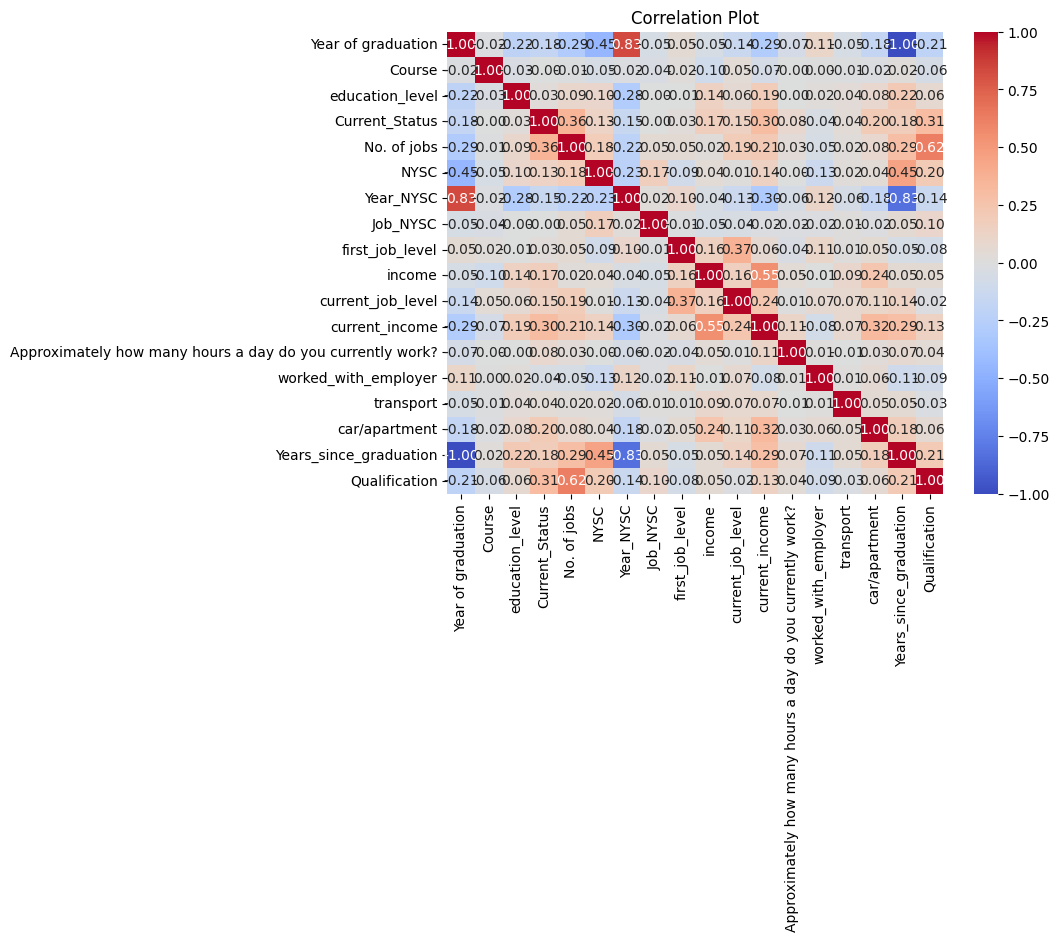

In [ ]:
import seaborn as sns
correlation_matrix = df_model.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5218
Data columns (total 19 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Gender                                                     5217 non-null   object 
 1   Year of graduation                                         5217 non-null   int64  
 2   Course                                                     5217 non-null   int64  
 3   education_level                                            5217 non-null   int64  
 4   Current_Status                                             5217 non-null   int64  
 5   No. of jobs                                                5217 non-null   int64  
 6   NYSC                                                       5216 non-null   float64
 7   Year_NYSC                                                  4276 non-null   float64
 8   Job_NYSC

In [ ]:
df_model = df_model.rename(columns={'Approximately how many hours a day do you currently work?': 'hours'})

In [ ]:
df_model['hours'].value_counts()

8.0     1014
9.0      805
10.0     590
12.0     234
7.0      179
6.0      152
11.0     122
5.0       89
24.0      29
14.0      29
4.0       28
13.0      24
0.0       22
2.0       18
15.0      17
18.0      17
3.0       14
20.0      11
16.0       9
8.5        7
9.5        6
1.0        4
17.0       3
10.5       3
19.0       2
7.5        1
23.0       1
4.5        1
Name: hours, dtype: int64

In [ ]:
conditions = [
    (df_model['hours'] < 8),
    (df_model['hours'] >= 8) & (df_model['hours'] <= 12),
    (df_model['hours'] > 12)
]
values = [0, 1, 2]
df_model['hours'] = np.select(conditions, values)

In [ ]:
df_model['hours'].value_counts()

1    2781
0    2294
2     142
Name: hours, dtype: int64

# Standard of life column

In [ ]:
def classify_individual(row):
    if row['hours'] < 2 and row['car/apartment'] == 1 and row['current_income'] > 3 and row['transport'] == 1:
        return 1
    else:
        return 0
df_model['Standard_Of_Life'] = df_model.apply(classify_individual, axis=1)

In [ ]:
df_model['Standard_Of_Life'].value_counts()

0    5118
1      99
Name: Standard_Of_Life, dtype: int64

<ipython-input-151-93d362b54414>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_model.corr()


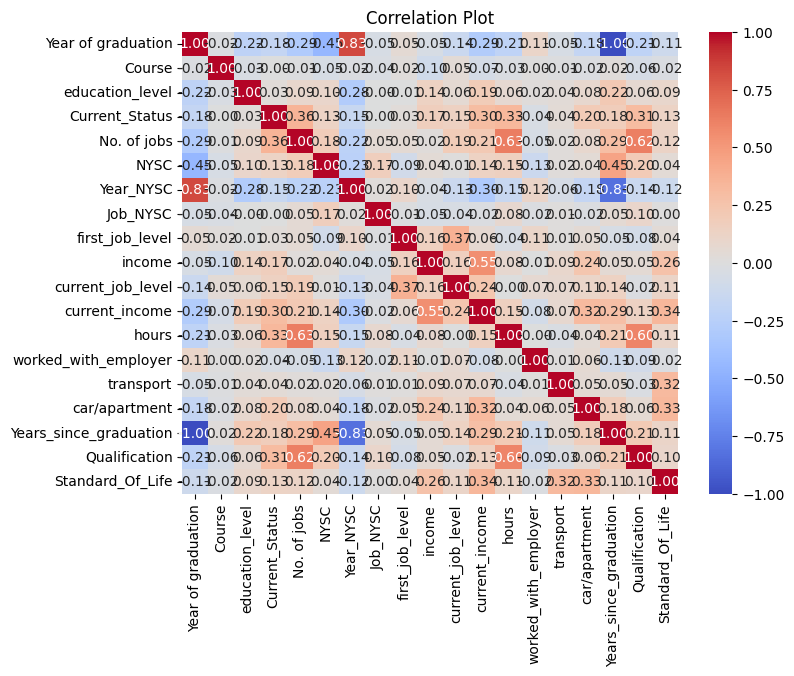

In [ ]:
correlation_matrix = df_model.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

In [ ]:
df_model = df_model.fillna(0)

# Training a Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target variable
X = df_model[['Year of graduation', 'Course', 'education_level', 'Current_Status', 'No. of jobs', 'NYSC', 'Year_NYSC', 'Job_NYSC', 'first_job_level', 'worked_with_employer', 'Years_since_graduation', 'Qualification', 'Standard_Of_Life']]
y = df_model['current_income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

feature_importance = model.coef_
print("Feature Importance:", feature_importance)

Mean Absolute Error: 0.7040773249390155
Mean Squared Error: 1.2121729300562318
Root Mean Squared Error: 1.1009872524494695
R-squared: 0.6275254930010372
Feature Importance: [-3.93887746e-02 -2.86573650e-02  4.36419857e-01  2.16459899e-01
  6.30946448e-01  4.31535936e-03  1.72942305e-05 -3.78236690e-03
 -2.01330806e-01  7.43285179e-01 -1.06073765e-01  4.92943481e-02
  6.68241158e-01  3.93887746e-02  6.03431474e-01  1.89787045e+00]


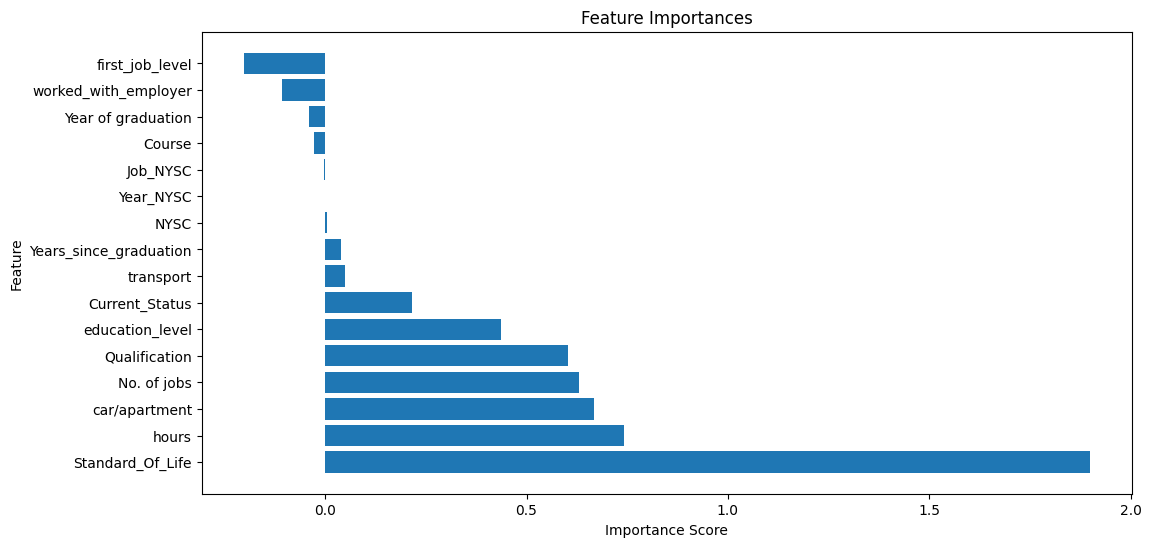

In [ ]:
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

this is just a base model yet but it perform good
we are able to get a lot of information out of this

As we can see from the plot above standard of living the feature that we created contributed most to the model that predicts the salary